<a href="https://colab.research.google.com/github/sahabi75/Assignment/blob/main/Defender%20Performance%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd          # For data loading, cleaning, merging, grouping
import numpy as np           # For numerical operations and array transformations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px   # For interactive charts (if notebook supports)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#dealing with imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
#Model Interpretation and Feature Importance
import shap           # SHAP values for interpretability (pip install shap)

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/Tittle Defense/Final Thesis/biometric_dataset.csv')
db.head()

FullName   Age  Height(m)    Position  \
0   Julio César Soler Barreto  20.0       1.75    Defender   
1               Ilya Zabarnyi  22.0       1.89    Defender   
2        Justin Dean Kluivert  26.0       1.72  Midfielder   
3  Kepa Arrizabalaga Revuelta  30.0       1.88  Goalkeeper   
4     William Jonathan Dennis  24.0       1.88  Goalkeeper   

                  Foot      CurrentClub  Total Distance(m) (per match)  \
0                 Left  AFC Bournemouth                        11150.0   
1                Right  AFC Bournemouth                        11500.0   
2  Both (ambidextrous)  AFC Bournemouth                        10500.0   
3                Right  AFC Bournemouth                         5350.0   
4                Right  AFC Bournemouth                         4850.0   

   High-Intensity Distance(m)  Sprint Distance(m)  Sprint Count  \
0                       975.0               375.0          21.5   
1                      1500.0               500.0          20.0   
2                      1350.0               700.0          21.5   
3                      1000.0               300.0          10.0   
4                       375.0               115.0          10.0   

   Acceleration Count (≥3 m/s²)  Deceleration Count (≤-3 m/s²)  \
0                          60.0                           55.0   
1                         100.0                           90.0   
2                          47.5                           42.5   
3                          20.0                           15.0   
4                          32.5                           27.5   

   PlayerLoad AU (GPS-derived)  Heart Rate Variability (ms)  \
0                        500.0                          NaN   
1                        750.0                         70.0   
2                        500.0                         70.0   
3                        400.0                         70.0   
4                        400.0                         75.0   

   VO₂ Max (ml/kg/min)  Muscle Strength (kg) (Leg Press)  \
0                 60.0                             200.0   
1                 52.5                             200.0   
2                 60.0                             190.0   
3                 50.0                             200.0   
4                 50.0                             235.0   

   Fatigue Biomarkers-CK (U/L)  Sleep Quality (percentage)  \
0                        225.0                        85.0   
1                        300.0                        82.5   
2                        300.0                        85.0   
3                        300.0                        85.0   
4                        225.0                        85.0   

   Sleep Duration (h)  Muscle Strength Asymmetry (%)  Stride Length(m)  \
0                8.75                            5.0              2.50   
1                8.25                            5.0              2.50   
2                7.75                            5.0              2.45   
3                8.00                            5.0               NaN   
4                8.00                            5.0              1.70   

   Ground Contact Time (ms)  Jump Height(cm) (Vertical)  Landing Mechanics  \
0                     200.0                        52.5               88.0   
1                     200.0                        60.0               90.0   
2                     200.0                        50.0               95.0   
3                     250.0                        55.0               90.0   
4                     200.0                        60.0               90.0   

   ChangeOfDirectionAngle(degree)  Stress Level (1-10)  \
0                            52.5                  4.0   
1                            52.5                  4.5   
2                            80.0                  5.0   
3                            67.5                  6.0   
4                            32.5                  4.0   

   Mental Fatigue (Cognitiv

In [ ]:
db = db.rename(columns={"FullName": "PlayerName"})

In [ ]:
db.head()

PlayerName   Age  Height(m)    Position  \
0   Julio César Soler Barreto  20.0       1.75    Defender   
1               Ilya Zabarnyi  22.0       1.89    Defender   
2        Justin Dean Kluivert  26.0       1.72  Midfielder   
3  Kepa Arrizabalaga Revuelta  30.0       1.88  Goalkeeper   
4     William Jonathan Dennis  24.0       1.88  Goalkeeper   

                  Foot      CurrentClub  Total Distance(m) (per match)  \
0                 Left  AFC Bournemouth                        11150.0   
1                Right  AFC Bournemouth                        11500.0   
2  Both (ambidextrous)  AFC Bournemouth                        10500.0   
3                Right  AFC Bournemouth                         5350.0   
4                Right  AFC Bournemouth                         4850.0   

   High-Intensity Distance(m)  Sprint Distance(m)  Sprint Count  \
0                       975.0               375.0          21.5   
1                      1500.0               500.0          20.0   
2                      1350.0               700.0          21.5   
3                      1000.0               300.0          10.0   
4                       375.0               115.0          10.0   

   Acceleration Count (≥3 m/s²)  Deceleration Count (≤-3 m/s²)  \
0                          60.0                           55.0   
1                         100.0                           90.0   
2                          47.5                           42.5   
3                          20.0                           15.0   
4                          32.5                           27.5   

   PlayerLoad AU (GPS-derived)  Heart Rate Variability (ms)  \
0                        500.0                          NaN   
1                        750.0                         70.0   
2                        500.0                         70.0   
3                        400.0                         70.0   
4                        400.0                         75.0   

   VO₂ Max (ml/kg/min)  Muscle Strength (kg) (Leg Press)  \
0                 60.0                             200.0   
1                 52.5                             200.0   
2                 60.0                             190.0   
3                 50.0                             200.0   
4                 50.0                             235.0   

   Fatigue Biomarkers-CK (U/L)  Sleep Quality (percentage)  \
0                        225.0                        85.0   
1                        300.0                        82.5   
2                        300.0                        85.0   
3                        300.0                        85.0   
4                        225.0                        85.0   

   Sleep Duration (h)  Muscle Strength Asymmetry (%)  Stride Length(m)  \
0                8.75                            5.0              2.50   
1                8.25                            5.0              2.50   
2                7.75                            5.0              2.45   
3                8.00                            5.0               NaN   
4                8.00                            5.0              1.70   

   Ground Contact Time (ms)  Jump Height(cm) (Vertical)  Landing Mechanics  \
0                     200.0                        52.5               88.0   
1                     200.0                        60.0               90.0   
2                     200.0                        50.0               95.0   
3                     250.0                        55.0               90.0   
4                     200.0                        60.0               90.0   

   ChangeOfDirectionAngle(degree)  Stress Level (1-10)  \
0                            52.5                  4.0   
1                            52.5                  4.5   
2                            80.0                  5.0   
3                            67.5                  6.0   
4                            32.5                  4.0   

   Mental Fatigue (Cognit

In [ ]:
di= pd.read_csv('/content/drive/MyDrive/Tittle Defense/Final Thesis/injury_dataset.csv')
di.head()

PlayerName  PastEarlySeasonInjuries  PastMidSeasonInjuries  \
0       Aaron Buchanan Hickey                      3.0                    5.0   
1  Aaron Christopher Ramsdale                      0.0                    1.0   
2           Aaron Wan-Bissaka                      6.0                    3.0   
3     Aaron William Cresswell                      4.0                    7.0   
4             Aarón Anselmino                      0.0                    0.0   

   PastLateSeasonInjuries  PastContactInjuries  PastNonContactInjuries  \
0                     1.0                  1.0                     1.0   
1                     1.0                  1.0                     0.0   
2                     1.0                  0.0                     2.0   
3                     2.0                  3.0                     7.0   
4                     1.0                  0.0                     1.0   

   PastBothInjuries  PastUnknownInjuries  PastNumberOfInjuries  \
0               3.0                  4.0                   9.0   
1               0.0                  1.0                   2.0   
2               3.0                  5.0                  10.0   
3               4.0                  1.0                  15.0   
4               0.0                  1.0                   2.0   

   PastTotalDaysOut  PastEarlySeasonDaysOut  PastMidSeasonDaysOut  \
0             726.0                   573.0                  87.0   
1              13.0                     0.0                   7.0   
2             252.0                   142.0                 104.0   
3             241.0                    44.0                  45.0   
4             109.0                     0.0                   0.0   

   PastLateSeasonDaysOut  PastEarlySeasonGamesMissed  \
0                   66.0                        87.0   
1                    6.0                         0.0   
2                    6.0                        31.0   
3                   58.0                         6.0   
4                   51.0                         0.0   

   PastMidSeasonGamesMissed  PastLateSeasonGamesMissed  PastTotalGamesMissed  \
0                      16.0                       12.0                 115.0   
1                       1.0                        0.0                   1.0   
2                      27.0                        1.0                  59.0   
3                      12.0                        8.0                  43.0   
4                       0.0                       11.0                  20.0   

   EarlySeasonInjuries_2024_25  MidSeasonInjuries_2024_25  \
0                          0.0                        1.0   
1                          1.0                        1.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          1.0                        1.0   

   LateSeasonInjuries_2024_25  ContactInjuries_2024_25  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   NonContactInjuries_2024_25  BothInjuries_2024_25  UnknownInjuries_2024_25  \
0                         0.0                   0.0                      1.0   
1                         1.0                   0.0                      1.0   
2                         0.0                   0.0                      0.0   
3                         1.0                   0.0                      0.0   
4                         2.0                   0.0                      0.0   

   NumberOfInjuries_2024_25  TotalDaysOut_2024_25  EarlySeasonDaysOut_2024_25  \
0                       1.0                  89.0                         0.0   
1                       2.0                  47.0                        40.0   
2                

In [ ]:
dp = pd.read_csv('/content/drive/MyDrive/Tittle Defense/Final Thesis/EPLDef (1).csv')
dp.head()

Full Name Player ID   Year               Team  MP   MIN  GLS  \
0  Harry Stefano Toffolo       HST   2025  Huddersfield Town   4   209    0   
1  Harry Stefano Toffolo       HST  24/25  Nottingham Forest   7   435    0   
2  Harry Stefano Toffolo       HST  23/24  Nottingham Forest  31  1896    1   
3  Harry Stefano Toffolo       HST  22/23  Nottingham Forest  21  1136    0   
4  Harry Stefano Toffolo       HST  21/22  Huddersfield Town  48  4047    6   

   AST  CLS  YC  RC  ELTG  DRP  TACK   INT   BLS   ADW  KEYP  BCC  SDRMP  \
0    1    0   0   0     0    2   4.0   2.0   1.0   1.0     2    0    0.0   
1    0    1   1   0     0    1   8.0   4.0   8.0   6.0     1    0    0.0   
2    3    1   3   0     0   13  34.0  18.0  14.0  32.0    21    3    2.0   
3    1    1   2   0     0    4  21.0  14.0   8.0  13.0     9    1    4.0   
4    8   17   4   0     0   14  45.0  36.0   9.0  63.0    38    5   13.0   

      APS  APS%   ALB  LBA% ACR   CA%   ASR  
0    88.0  84.6   7.0  50.0   2  18.2  6.73  
1   170.0  85.9  11.0  45.8   0   NaN  7.18  
2   420.0  76.1  19.0  25.3  21  33.3  6.76  
3   246.0  67.4   7.0  15.2   9  23.1  6.61  
4  1216.0  74.9  65.0  32.0  30  21.1  6.86

In [ ]:
dp.shape

(1536, 27)

In [ ]:
de= pd.read_csv('/content/drive/MyDrive/Tittle Defense/Final Thesis/LaligaDefender (1).csv')
de.head()

Full Name Player ID   Year     Team  MP   MIN  GLS  AST  \
0  Javier Hernández Carrera       JHC  25/26    Cádiz  11   643    0    0   
1  Javier Hernández Carrera       JHC  24/25    Cádiz  35  2654    3    1   
2  Javier Hernández Carrera       JHC  23/24    Cádiz  30  2517    1    2   
3  Javier Hernández Carrera       JHC  22/23   Girona  26  1231    1    3   
4  Javier Hernández Carrera       JHC  21/22  Leganés  40  3565    3    1   

    CLS    YC   RC  ELTG   DRP  TACK   INT  BLS   ADW  KEYP  BCC  SDRMP  \
0   0.0   2.0  0.0   0.0   1.0   6.0   1.0  2.0   5.0     1    0      1   
1   7.0   7.0  0.0   0.0  30.0  28.0  29.0  7.0  23.0    19    3     19   
2   5.0  10.0  0.0   0.0  21.0  43.0  19.0  9.0  31.0    33    4     13   
3   1.0   3.0  0.0   0.0   8.0  22.0   7.0  5.0  12.0    10    2     11   
4  11.0  10.0  0.0   0.0  22.0  50.0  39.0  9.0  61.0    23    2     44   

      APS  APS%    ALB  LBA%   ACR   CA%   ASR  
0   191.0  84.9    7.0  36.8   0.0   NaN  6.23  
1   782.0  78.7   46.0  37.7   7.0  12.5  6.73  
2   718.0  73.9   51.0  32.9  39.0  30.7  6.74  
3   606.0  82.4   28.0  50.0   5.0  29.4  6.75  
4  1495.0  79.4  125.0  46.3   5.0   6.3  6.85

In [ ]:
de.shape

(1338, 27)

In [ ]:
merged_pf = pd.concat([dp, de], ignore_index=True)

In [ ]:
merged_pf.head()

Full Name Player ID   Year               Team  MP   MIN  GLS  \
0  Harry Stefano Toffolo       HST   2025  Huddersfield Town   4   209    0   
1  Harry Stefano Toffolo       HST  24/25  Nottingham Forest   7   435    0   
2  Harry Stefano Toffolo       HST  23/24  Nottingham Forest  31  1896    1   
3  Harry Stefano Toffolo       HST  22/23  Nottingham Forest  21  1136    0   
4  Harry Stefano Toffolo       HST  21/22  Huddersfield Town  48  4047    6   

   AST   CLS   YC   RC  ELTG   DRP  TACK   INT   BLS   ADW  KEYP  BCC  SDRMP  \
0    1   0.0  0.0  0.0   0.0   2.0   4.0   2.0   1.0   1.0     2    0    0.0   
1    0   1.0  1.0  0.0   0.0   1.0   8.0   4.0   8.0   6.0     1    0    0.0   
2    3   1.0  3.0  0.0   0.0  13.0  34.0  18.0  14.0  32.0    21    3    2.0   
3    1   1.0  2.0  0.0   0.0   4.0  21.0  14.0   8.0  13.0     9    1    4.0   
4    8  17.0  4.0  0.0   0.0  14.0  45.0  36.0   9.0  63.0    38    5   13.0   

      APS  APS%   ALB  LBA% ACR   CA%   ASR  
0    88.0  84.6   7.0  50.0   2  18.2  6.73  
1   170.0  85.9  11.0  45.8   0   NaN  7.18  
2   420.0  76.1  19.0  25.3  21  33.3  6.76  
3   246.0  67.4   7.0  15.2   9  23.1  6.61  
4  1216.0  74.9  65.0  32.0  30  21.1  6.86

In [ ]:
merged_pf.shape

(2874, 27)

In [ ]:
merged_pf.to_csv('/content/merged_players.csv', index=False)


In [ ]:


# Ensure proper dtypes
merged_pf["Year"] = merged_pf["Year"].astype(str)
merged_pf["Full Name"] = merged_pf["Full Name"].astype(str).str.strip()

# Stat columns in raw file
stat_cols = [
    "MIN","GLS","AST","CLS","YC","RC","ELTG","DRP","TACK","INT",
    "BLS","ADW","KEYP","BCC","SDRMP","APS","APS%","ALB","LBA%",
    "ACR","CA%","ASR"
]

for col in ["MP"] + stat_cols:
    merged_pf[col] = pd.to_numeric(merged_pf[col], errors="coerce")

print("\nMerged defenders shape:", merged_pf.shape)
print("Years present:", merged_pf["Year"].unique())


Merged defenders shape: (2874, 27)
Years present: ['2025' '24/25' '23/24' '22/23' '21/22' '20/21' '19/20' '19/21' '18/19'
 '15/16' '25/26' '17/18' '16/17' '2019' '2018' '2023' '2022' '2024' '2017'
 '2021' '2020' '25/25' '2016' '2015']


In [ ]:
season_mask = merged_pf["Year"] == "24/25"
before_df = merged_pf[~season_mask].copy()
season_df = merged_pf[season_mask].copy()

print("Rows BEFORE 24/25:", before_df.shape[0])
print("Rows IN 24/25   :", season_df.shape[0])

# Which stats to SUM vs AVERAGE across seasons
sum_stats = [
    "MIN","GLS","AST","CLS","YC","RC","ELTG","DRP","TACK","INT",
    "BLS","ADW","KEYP","BCC","SDRMP"
]

avg_stats = ["APS","APS%","ALB","LBA%","ACR","CA%","ASR"]

Rows BEFORE 24/25: 2525
Rows IN 24/25   : 349


In [ ]:
if not before_df.empty:
    before_sum = (
        before_df
        .groupby("Full Name")[["MP"] + sum_stats]
        .sum()
        .reset_index()
    )

    # per-match averages for summed stats
    for s in sum_stats:
        before_sum[f"Avg_{s}_per_match"] = (
            before_sum[s] / before_sum["MP"].replace(0, np.nan)
        )

    before_avg = (
        before_df
        .groupby("Full Name")[avg_stats]
        .mean()
        .reset_index()
    )

    before_agg = pd.merge(before_sum, before_avg, on="Full Name", how="left")

    columns_to_keep = (
        ["Full Name", "MP"] +
        [f"Avg_{s}_per_match" for s in sum_stats] +
        avg_stats
    )
    before_agg = before_agg[columns_to_keep]

    rename_before = {"MP": "Total_MP_before"}
    for s in sum_stats:
        rename_before[f"Avg_{s}_per_match"] = f"Avg_{s}_per_match_before"
    for a in avg_stats:
        rename_before[a] = f"Avg_{a}_before"

    before_agg = before_agg.rename(columns=rename_before)

else:
    before_agg = pd.DataFrame(columns=["Full Name"])

print("\nBEFORE 24/25 aggregated shape:", before_agg.shape)


BEFORE 24/25 aggregated shape: (355, 24)


In [ ]:
if not season_df.empty:
    season_sum = (
        season_df
        .groupby("Full Name")[["MP"] + sum_stats]
        .sum()
        .reset_index()
    )

    for s in sum_stats:
        season_sum[f"Avg_{s}_per_match"] = (
            season_sum[s] / season_sum["MP"].replace(0, np.nan)
        )

    season_avg = (
        season_df
        .groupby("Full Name")[avg_stats]
        .mean()
        .reset_index()
    )

    season_agg = pd.merge(season_sum, season_avg, on="Full Name", how="left")

    columns_to_keep = (
        ["Full Name", "MP"] +
        [f"Avg_{s}_per_match" for s in sum_stats] +
        avg_stats
    )
    season_agg = season_agg[columns_to_keep]

    rename_2425 = {"MP": "Total_MP_2425"}
    for s in sum_stats:
        rename_2425[f"Avg_{s}_per_match"] = f"Avg_{s}_per_match_2425"
    for a in avg_stats:
        rename_2425[a] = f"Avg_{a}_2425"

    season_agg = season_agg.rename(columns=rename_2425)
else:
    season_agg = pd.DataFrame(columns=["Full Name"])

print("24/25 aggregated shape:", season_agg.shape)

24/25 aggregated shape: (348, 24)


In [ ]:

final_df = pd.merge(before_agg, season_agg, on="Full Name", how="outer")
print("\nFinal aggregated shape:", final_df.shape)
print(final_df.head())



Final aggregated shape: (355, 47)
                 Full Name  Total_MP_before  Avg_MIN_per_match_before  \
0    Aaron Buchanan Hickey              107                 75.710280   
1        Aaron Wan-Bissaka              241                 84.813278   
2  Aaron William Cresswell              306                 82.503268   
3          Aarón Anselmino               26                 66.192308   
4         Abdelkaber Abqar               76                 82.539474   

   Avg_GLS_per_match_before  Avg_AST_per_match_before  \
0                  0.065421                  0.028037   
1                  0.008299                  0.070539   
2                  0.029412                  0.114379   
3                  0.076923                  0.115385   
4                  0.013158                  0.013158   

   Avg_CLS_per_match_before  Avg_YC_per_match_before  Avg_RC_per_match_before  \
0                  0.102804                 0.252336                 0.018692   
1                  0.

In [ ]:
from sklearn.decomposition import PCA

perf_cols_2425 = [
    "Avg_TACK_per_match_2425",
    "Avg_INT_per_match_2425",
    "Avg_BLS_per_match_2425",
    "Avg_ADW_per_match_2425",
    "Avg_CLS_per_match_2425",
    "Avg_ALB_2425"
]

df_perf = final_df.copy()

# need at least some 24/25 performance data
mask_perf = df_perf[perf_cols_2425].notnull().sum(axis=1) >= 3

# impute missing within performance stats
imputer_perf = SimpleImputer(strategy="mean")
X_perf = imputer_perf.fit_transform(df_perf.loc[mask_perf, perf_cols_2425])

scaler_perf = StandardScaler()
X_perf_scaled = scaler_perf.fit_transform(X_perf)

pca = PCA(n_components=1, random_state=42)
df_perf.loc[mask_perf, "DefenderRating"] = pca.fit_transform(X_perf_scaled).ravel()

# Percentile (0–1) as target for prediction
df_perf["DefenderRatingPercentile"] = df_perf["DefenderRating"].rank(pct=True)

print("\nPreview of DefenderRating:")
print(df_perf[["Full Name", "DefenderRating", "DefenderRatingPercentile"]].head())


Preview of DefenderRating:
                 Full Name  DefenderRating  DefenderRatingPercentile
0    Aaron Buchanan Hickey             NaN                       NaN
1        Aaron Wan-Bissaka        1.003208                  0.712644
2  Aaron William Cresswell       -1.412322                  0.178161
3          Aarón Anselmino       -2.998488                  0.017241
4         Abdelkaber Abqar        1.558239                  0.839080


In [ ]:
cols_2425_to_drop = [
    c for c in df_perf.columns
    if "2425" in c and not c.startswith("DefenderRating")
]
df_perf = df_perf.drop(columns=cols_2425_to_drop, errors="ignore")

print("\nColumns after dropping raw 24/25 stats (kept DefenderRating*):")
print(df_perf.columns.tolist())


Columns after dropping raw 24/25 stats (kept DefenderRating*):
['Full Name', 'Total_MP_before', 'Avg_MIN_per_match_before', 'Avg_GLS_per_match_before', 'Avg_AST_per_match_before', 'Avg_CLS_per_match_before', 'Avg_YC_per_match_before', 'Avg_RC_per_match_before', 'Avg_ELTG_per_match_before', 'Avg_DRP_per_match_before', 'Avg_TACK_per_match_before', 'Avg_INT_per_match_before', 'Avg_BLS_per_match_before', 'Avg_ADW_per_match_before', 'Avg_KEYP_per_match_before', 'Avg_BCC_per_match_before', 'Avg_SDRMP_per_match_before', 'Avg_APS_before', 'Avg_APS%_before', 'Avg_ALB_before', 'Avg_LBA%_before', 'Avg_ACR_before', 'Avg_CA%_before', 'Avg_ASR_before', 'DefenderRating', 'DefenderRatingPercentile']


In [ ]:
rename_dict = {
    "Full Name": "Player Name",
    "Total_MP_before": "Total Matches Played (Before 2024/25)",

    "Avg_MIN_per_match_before": "Average Minutes per Match (Before 2024/25)",
    "Avg_GLS_per_match_before": "Average Goals per Match (Before 2024/25)",
    "Avg_AST_per_match_before": "Average Assists per Match (Before 2024/25)",
    "Avg_CLS_per_match_before": "Average Clean Sheets per Match (Before 2024/25)",

    "Avg_YC_per_match_before": "Average Yellow Cards per Match (Before 2024/25)",
    "Avg_RC_per_match_before": "Average Red Cards per Match (Before 2024/25)",
    "Avg_ELTG_per_match_before": "Average Errors Leading to Goal (Before 2024/25)",
    "Avg_DRP_per_match_before": "Average Times Dribbled Past per Match (Before 2024/25)",
    "Avg_TACK_per_match_before": "Average Tackles per Match (Before 2024/25)",
    "Avg_INT_per_match_before": "Average Interceptions per Match (Before 2024/25)",
    "Avg_BLS_per_match_before": "Average Blocked Shots per Match (Before 2024/25)",
    "Avg_ADW_per_match_before": "Average Aerial Duels Won per Match (Before 2024/25)",

    "Avg_KEYP_per_match_before": "Average Key Passes per Match (Before 2024/25)",
    "Avg_BCC_per_match_before": "Average Big Chances Created per Match (Before 2024/25)",
    "Avg_SDRMP_per_match_before": "Average Successful Dribbles per Match (Before 2024/25)",

    "Avg_APS_before": "Average Accurate Passes (Before 2024/25)",
    "Avg_APS%_before": "Passing Accuracy (%) (Before 2024/25)",
    "Avg_ALB_before": "Average Accurate Long Balls (Before 2024/25)",
    "Avg_LBA%_before": "Long Ball Accuracy (%) (Before 2024/25)",
    "Avg_ACR_before": "Average Accurate Crosses (Before 2024/25)",
    "Avg_CA%_before": "Crossing Accuracy (%) (Before 2024/25)",
    "Avg_ASR_before": "Average Sofascore Rating (Before 2024/25)"
}

df_perf = df_perf.rename(columns=rename_dict)

print("\nColumns after renaming:")
print(df_perf.columns.tolist())



Columns after renaming:
['Player Name', 'Total Matches Played (Before 2024/25)', 'Average Minutes per Match (Before 2024/25)', 'Average Goals per Match (Before 2024/25)', 'Average Assists per Match (Before 2024/25)', 'Average Clean Sheets per Match (Before 2024/25)', 'Average Yellow Cards per Match (Before 2024/25)', 'Average Red Cards per Match (Before 2024/25)', 'Average Errors Leading to Goal (Before 2024/25)', 'Average Times Dribbled Past per Match (Before 2024/25)', 'Average Tackles per Match (Before 2024/25)', 'Average Interceptions per Match (Before 2024/25)', 'Average Blocked Shots per Match (Before 2024/25)', 'Average Aerial Duels Won per Match (Before 2024/25)', 'Average Key Passes per Match (Before 2024/25)', 'Average Big Chances Created per Match (Before 2024/25)', 'Average Successful Dribbles per Match (Before 2024/25)', 'Average Accurate Passes (Before 2024/25)', 'Passing Accuracy (%) (Before 2024/25)', 'Average Accurate Long Balls (Before 2024/25)', 'Long Ball Accuracy 

In [ ]:
def clean_name(x):
    return str(x).strip().lower()

# Prepare names for merge
df_perf["PlayerName"] = df_perf["Player Name"].astype(str)
df_perf["PlayerKey"] = df_perf["PlayerName"].apply(clean_name)

db["PlayerKey"] = db["PlayerName"].apply(clean_name)
di["PlayerKey"] = di["PlayerName"].apply(clean_name)

merged = df_perf.merge(db, on="PlayerKey", how="inner", suffixes=("", "_bio"))
merged = merged.merge(di, on="PlayerKey", how="inner", suffixes=("", "_inj"))

# Drop duplicate name columns if present
dup_name_cols = [c for c in ["PlayerName_bio", "PlayerName_inj"] if c in merged.columns]
merged = merged.drop(columns=dup_name_cols, errors="ignore")

# Keep one PlayerName and drop PlayerKey if not needed
if "PlayerName" in merged.columns:
    merged = merged.drop(columns=["PlayerKey"], errors="ignore")
else:
    # if rename happened somehow:
    merged = merged.rename(columns={"PlayerName_x": "PlayerName"})
    merged = merged.drop(columns=["PlayerName_y", "PlayerKey"], errors="ignore")

df = merged.copy()
print("\nMerged full dataset shape (performance + bio + injury):", df.shape)



Merged full dataset shape (performance + bio + injury): (265, 93)


In [ ]:
cols_to_drop = [
    "EarlySeasonInjuries_2024_25",
    "MidSeasonInjuries_2024_25",
    "LateSeasonInjuries_2024_25",
    "ContactInjuries_2024_25",
    "NonContactInjuries_2024_25",
    "BothInjuries_2024_25",
    "UnknownInjuries_2024_25",
    "NumberOfInjuries_2024_25",
    "TotalDaysOut_2024_25",
    "EarlySeasonDaysOut_2024_25",
    "MidSeasonDaysOut_2024_25",
    "LateSeasonDaysOut_2024_25",
    "EarlySeasonGamesMissed_2024_25",
    "MidSeasonGamesMissed_2024_25",
    "LateSeasonGamesMissed_2024_25",
    "TotalGamesMissed_2024_25",

    "PlayerName",
    "Player Name",
    "Position",
    "Foot",
    "CurrentClub"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")
print("\nShape after dropping ID / leak columns:", df.shape)


Shape after dropping ID / leak columns: (265, 72)


In [ ]:
df.shape

(265, 72)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Total Matches Played (Before 2024/25)                   265 non-null    int64  
 1   Average Minutes per Match (Before 2024/25)              265 non-null    float64
 2   Average Goals per Match (Before 2024/25)                265 non-null    float64
 3   Average Assists per Match (Before 2024/25)              265 non-null    float64
 4   Average Clean Sheets per Match (Before 2024/25)         265 non-null    float64
 5   Average Yellow Cards per Match (Before 2024/25)         265 non-null    float64
 6   Average Red Cards per Match (Before 2024/25)            265 non-null    float64
 7   Average Errors Leading to Goal (Before 2024/25)         265 non-null    float64
 8   Average Times Dribbled Past per Match (B

In [ ]:
from sklearn.impute import KNNImputer

df_clean = df.copy()

biometric_cols = [
    "Total Distance(m) (per match)",
    "High-Intensity Distance(m)",
    "Sprint Distance(m)",
    "Sprint Count",
    "Acceleration Count (≥3 m/s²)",
    "Deceleration Count (≤-3 m/s²)",
    "PlayerLoad AU (GPS-derived)",
    "Heart Rate Variability (ms)",
    "VO₂ Max (ml/kg/min)",
    "Muscle Strength (kg) (Leg Press)",
    "Fatigue Biomarkers-CK (U/L)",
    "Muscle Strength Asymmetry (%)",
    "Stride Length(m)",
    "Ground Contact Time (ms)",
    "Jump Height(cm) (Vertical)",
    "Landing Mechanics",
    "ChangeOfDirectionAngle(degree)",
    "GPS PlayerLoad (AU)",
    "GPS Total Distance(m)",
    "ForcePlateJumpPower(W)",
    "ForcePlateSymmetry",
    "RPE_Match",
    "RPE_Training",
    "RPE_Avg"
]

psychological_cols = [
    "Stress Level (1-10)",
    "Mental Fatigue (Cognitive Tests)"
]

# Keep only biometric cols that exist
biometric_cols = [c for c in biometric_cols if c in df_clean.columns]

# Other numeric columns with NaNs
small_missing_cols = [
    col for col in df_clean.columns
    if df_clean[col].isnull().sum() > 0
    and col not in biometric_cols
    and col not in psychological_cols
]

# KNN for biometric
if biometric_cols:
    knn_imputer = KNNImputer(n_neighbors=5)
    df_clean[biometric_cols] = knn_imputer.fit_transform(df_clean[biometric_cols])

# Median for psychological
for col in psychological_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Mean for the rest with small missingness
for col in small_missing_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print("\nRemaining missing values (top 20):")
print(df_clean.isnull().sum().sort_values(ascending=False).head(20))


Remaining missing values (top 20):
Total Matches Played (Before 2024/25)                     0
Average Minutes per Match (Before 2024/25)                0
Average Goals per Match (Before 2024/25)                  0
Average Assists per Match (Before 2024/25)                0
Average Clean Sheets per Match (Before 2024/25)           0
Average Yellow Cards per Match (Before 2024/25)           0
Average Red Cards per Match (Before 2024/25)              0
Average Errors Leading to Goal (Before 2024/25)           0
Average Times Dribbled Past per Match (Before 2024/25)    0
Average Tackles per Match (Before 2024/25)                0
Average Interceptions per Match (Before 2024/25)          0
Average Blocked Shots per Match (Before 2024/25)          0
Average Aerial Duels Won per Match (Before 2024/25)       0
Average Key Passes per Match (Before 2024/25)             0
Average Big Chances Created per Match (Before 2024/25)    0
Average Successful Dribbles per Match (Before 2024/25)    0
Aver

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 72 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Total Matches Played (Before 2024/25)                   265 non-null    int64  
 1   Average Minutes per Match (Before 2024/25)              265 non-null    float64
 2   Average Goals per Match (Before 2024/25)                265 non-null    float64
 3   Average Assists per Match (Before 2024/25)              265 non-null    float64
 4   Average Clean Sheets per Match (Before 2024/25)         265 non-null    float64
 5   Average Yellow Cards per Match (Before 2024/25)         265 non-null    float64
 6   Average Red Cards per Match (Before 2024/25)            265 non-null    float64
 7   Average Errors Leading to Goal (Before 2024/25)         265 non-null    float64
 8   Average Times Dribbled Past per Match (B

In [ ]:
df_clean.head()

Total Matches Played (Before 2024/25)  \
0                                    107   
1                                    241   
2                                    306   
3                                     26   
4                                    119   

   Average Minutes per Match (Before 2024/25)  \
0                                   75.710280   
1                                   84.813278   
2                                   82.503268   
3                                   66.192308   
4                                   77.361345   

   Average Goals per Match (Before 2024/25)  \
0                                  0.065421   
1                                  0.008299   
2                                  0.029412   
3                                  0.076923   
4                                  0.016807   

   Average Assists per Match (Before 2024/25)  \
0                                    0.028037   
1                                    0.070539   
2                                    0.114379   
3                                    0.115385   
4                                    0.000000   

   Average Clean Sheets per Match (Before 2024/25)  \
0                                         0.102804   
1                                         0.269710   
2                                         0.222222   
3                                         0.153846   
4                                         0.218487   

   Average Yellow Cards per Match (Before 2024/25)  \
0                                         0.252336   
1                                         0.120332   
2                                         0.111111   
3                                         0.192308   
4                                         0.210084   

   Average Red Cards per Match (Before 2024/25)  \
0                                      0.018692   
1                                      0.008299   
2                                      0.009804   
3                                      0.000000   
4                                      0.033613   

   Average Errors Leading to Goal (Before 2024/25)  \
0                                         0.009346   
1                                         0.000000   
2                                         0.019608   
3                                         0.000000   
4                                         0.016807   

   Average Times Dribbled Past per Match (Before 2024/25)  \
0                                           0.411215        
1                                           0.365145        
2                                           0.457516        
3                                           0.461538        
4                                           0.386555        

   Average Tackles per Match (Before 2024/25)  \
0                                    1.280374   
1                                    2.767635   
2                                    0.967320   
3                                    1.961538   
4                                    0.882353   

   Average Interceptions per Match (Before 2024/25)  \
0                                          0.775701   
1                                          1.817427   
2                                          1.107843   
3                                          1.153846   
4                                          0.882353   

   Average Blocked Shots per Match (Before 2024/25)  \
0                                          0.289720   
1                                          0.443983   
2                                          0.359477   
3                                          0.500000   
4                                          0.613445   

   Average Aerial Duels Won per Match (Before 2024/25)  \
0                                           0.588785     
1                                           0.875519     
2                                           1.153595     
3                          

In [ ]:
df_out = df_clean.copy()

# Performance features: anything with "(Before 2024/25)" in name
performance_cols = [
    c for c in df_out.columns if "(Before 2024/25)" in c
]

def iqr_cap(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

for col in performance_cols:
    df_out[col] = iqr_cap(df_out[col])

def winsorize_zscore(series, z=3):
    mean = series.mean()
    std = series.std()
    lower = mean - z * std
    upper = mean + z * std
    return series.clip(lower, upper)

for col in biometric_cols:
    df_out[col] = winsorize_zscore(df_out[col])

if "Stress Level (1-10)" in df_out.columns:
    df_out["Stress Level (1-10)"] = df_out["Stress Level (1-10)"].clip(1, 10)

if "Mental Fatigue (Cognitive Tests)" in df_out.columns:
    df_out["Mental Fatigue (Cognitive Tests)"] = (
        df_out["Mental Fatigue (Cognitive Tests)"].clip(lower=0)
    )

print("\ndf_out shape after outlier handling:", df_out.shape)


df_out shape after outlier handling: (265, 72)


In [ ]:
df_out.describe()

Total Matches Played (Before 2024/25)  \
count                             265.000000   
mean                              188.762264   
std                                91.214201   
min                                 3.000000   
25%                               114.000000   
50%                               195.000000   
75%                               262.000000   
max                               411.000000   

       Average Minutes per Match (Before 2024/25)  \
count                                  265.000000   
mean                                    76.954556   
std                                      7.774148   
min                                     58.100000   
25%                                     72.777778   
50%                                     78.932642   
75%                                     82.562963   
max                                     88.982818   

       Average Goals per Match (Before 2024/25)  \
count                                265.000000   
mean                                   0.039963   
std                                    0.024452   
min                                    0.000000   
25%                                    0.023923   
50%                                    0.036585   
75%                                    0.056604   
max                                    0.105624   

       Average Assists per Match (Before 2024/25)  \
count                                  265.000000   
mean                                     0.052307   
std                                      0.041724   
min                                      0.000000   
25%                                      0.021053   
50%                                      0.037815   
75%                                      0.076923   
max                                      0.160729   

       Average Clean Sheets per Match (Before 2024/25)  \
count                                       265.000000   
mean                                          0.220363   
std                                           0.071681   
min                                           0.050699   
25%                                           0.181818   
50%                                           0.228571   
75%                                           0.269231   
max                                           0.378840   

       Average Yellow Cards per Match (Before 2024/25)  \
count                                       265.000000   
mean                                          0.157313   
std                                           0.067254   
min                                           0.000000   
25%                                           0.109434   
50%                                           0.150485   
75%                                           0.204301   
max                                           0.346602   

       Average Red Cards per Match (Before 2024/25)  \
count                                    265.000000   
mean                                       0.008171   
std                                        0.008804   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.005376   
75%                                        0.012448   
max                                        0.031120   

       Average Errors Leading to Goal (Before 2024/25)  \
count                                       265.000000   
mean                                          0.011906   
std                                           0.012815   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.008197   
75%                                           0.017964   
max                                           0.044910   

       Average Times Dribbled Past per Match (Before 2024/25)  \
count                       

In [ ]:
df_out

Total Matches Played (Before 2024/25)  \
0                                      107   
1                                      241   
2                                      306   
3                                       26   
4                                      119   
..                                     ...   
260                                    211   
261                                      5   
262                                    266   
263                                    144   
264                                    281   

     Average Minutes per Match (Before 2024/25)  \
0                                     75.710280   
1                                     84.813278   
2                                     82.503268   
3                                     66.192308   
4                                     77.361345   
..                                          ...   
260                                   79.308057   
261                                   62.600000   
262                                   82.526316   
263                                   66.402778   
264                                   77.483986   

     Average Goals per Match (Before 2024/25)  \
0                                    0.065421   
1                                    0.008299   
2                                    0.029412   
3                                    0.076923   
4                                    0.016807   
..                                        ...   
260                                  0.047393   
261                                  0.000000   
262                                  0.078947   
263                                  0.034722   
264                                  0.035587   

     Average Assists per Match (Before 2024/25)  \
0                                      0.028037   
1                                      0.070539   
2                                      0.114379   
3                                      0.115385   
4                                      0.000000   
..                                          ...   
260                                    0.146919   
261                                    0.160729   
262                                    0.026316   
263                                    0.076389   
264                                    0.106762   

     Average Clean Sheets per Match (Before 2024/25)  \
0                                           0.102804   
1                                           0.269710   
2                                           0.222222   
3                                           0.153846   
4                                           0.218487   
..                                               ...   
260                                         0.265403   
261                                         0.050699   
262                                         0.342105   
263                                         0.125000   
264                                         0.188612   

     Average Yellow Cards per Match (Before 2024/25)  \
0                                           0.252336   
1                                           0.120332   
2                                           0.111111   
3                                           0.192308   
4                                           0.210084   
..                                               ...   
260                                         0.170616   
261                                         0.000000   
262                                         0.142857   
263                                         0.118056   
264                                         0.163701   

     Average Red Cards per Match (Before 2024/25)  \
0                                        0.018692   
1                                        0.008299   
2                                        0.009804   
3                                        0.000000   
4                         

In [ ]:
df_out.to_csv('cleaned_defender_data.csv', index=False)

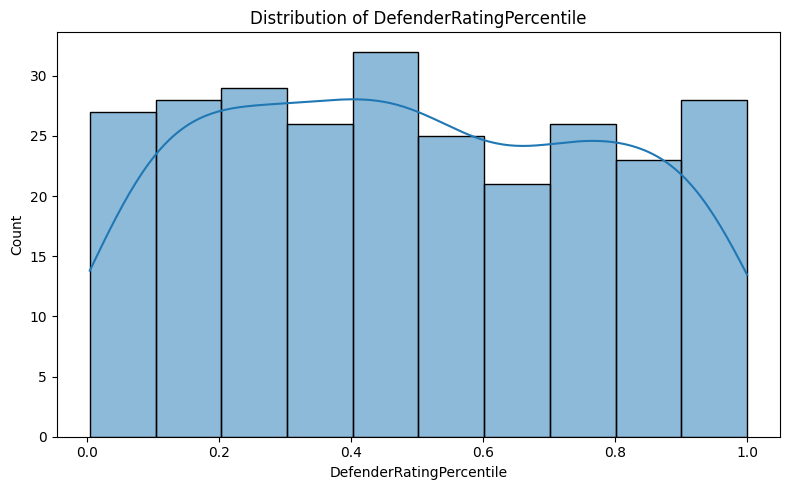

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df_out["DefenderRatingPercentile"], kde=True)
plt.title("Distribution of DefenderRatingPercentile")
plt.xlabel("DefenderRatingPercentile")
plt.tight_layout()
plt.savefig("/content/eda_1_striker_performance_distribution.png", dpi=300)
plt.show()


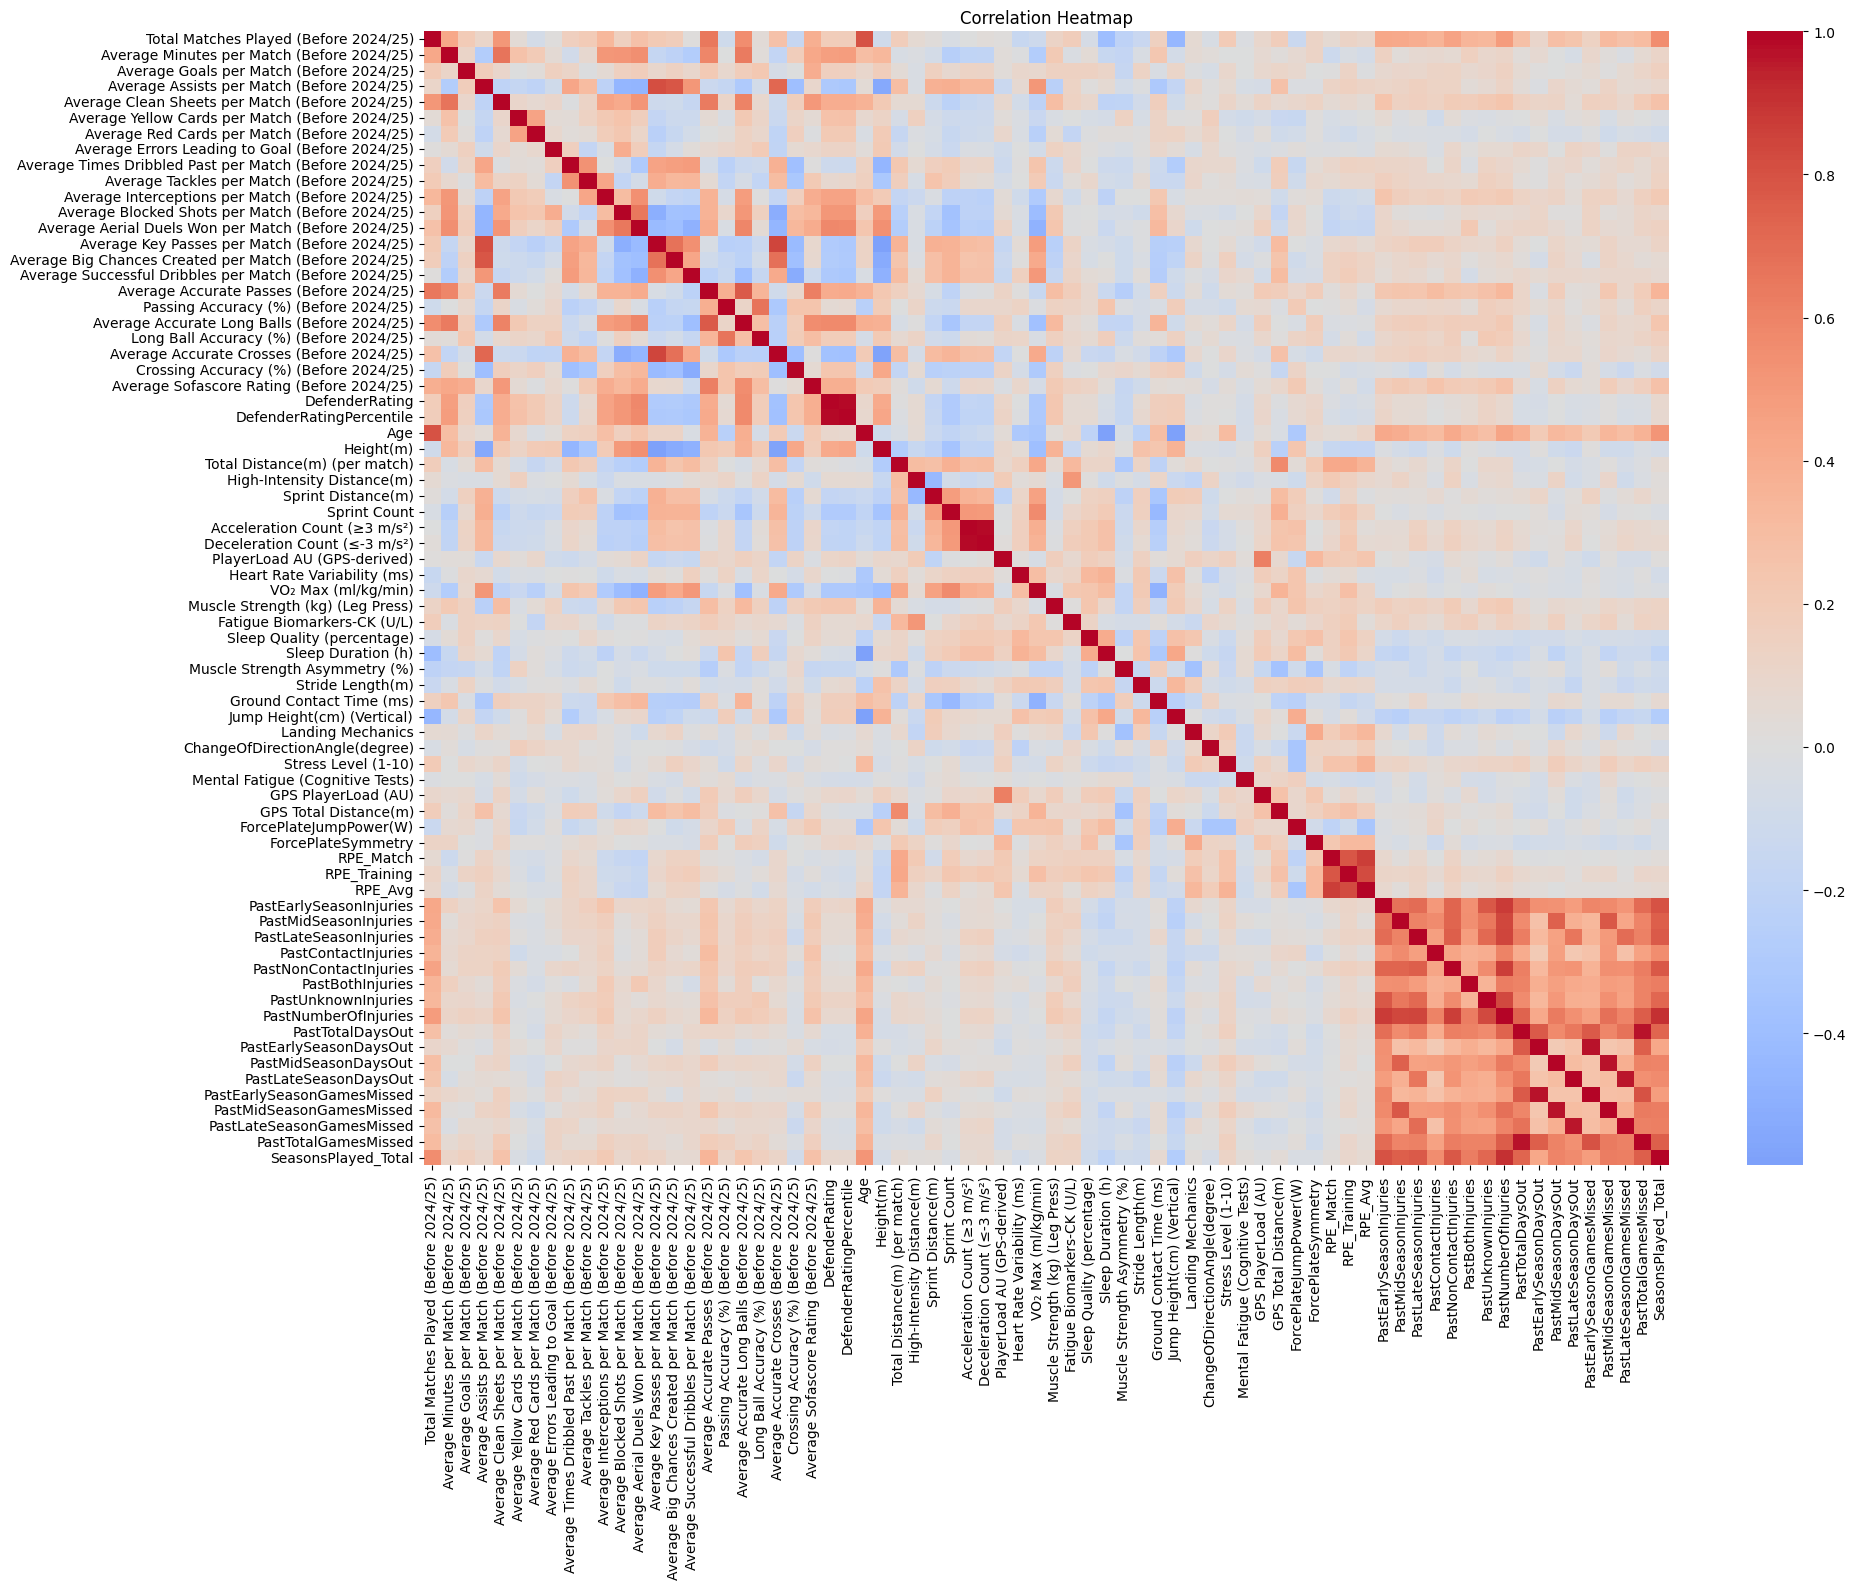

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df_out.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("/content/eda_2_correlation_heatmap.png", dpi=300)
plt.show()



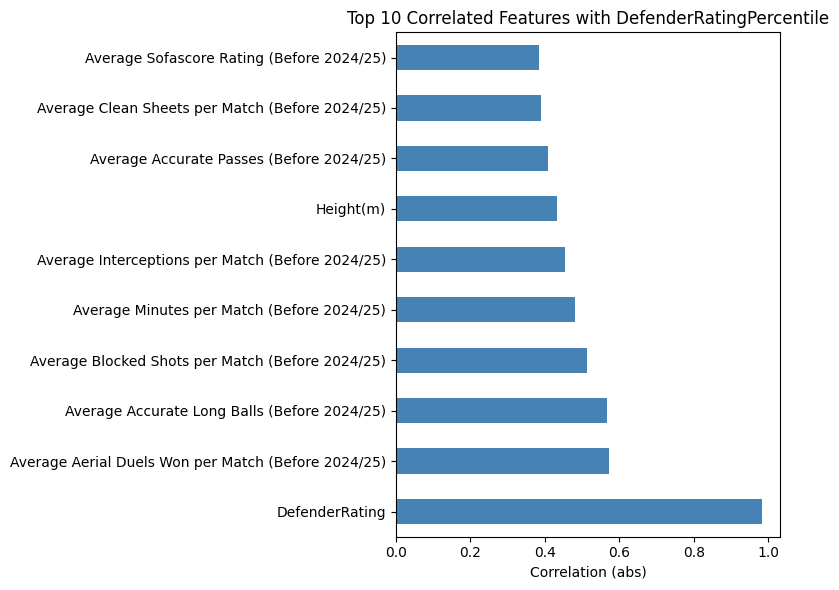

In [ ]:
corr_target = df_out.corr()["DefenderRatingPercentile"].abs().sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr_target[1:11].plot(kind='barh', color='steelblue')
plt.title("Top 10 Correlated Features with DefenderRatingPercentile")
plt.xlabel("Correlation (abs)")
plt.tight_layout()
plt.savefig("/content/eda_3_top10_correlations.png", dpi=300)
plt.show()


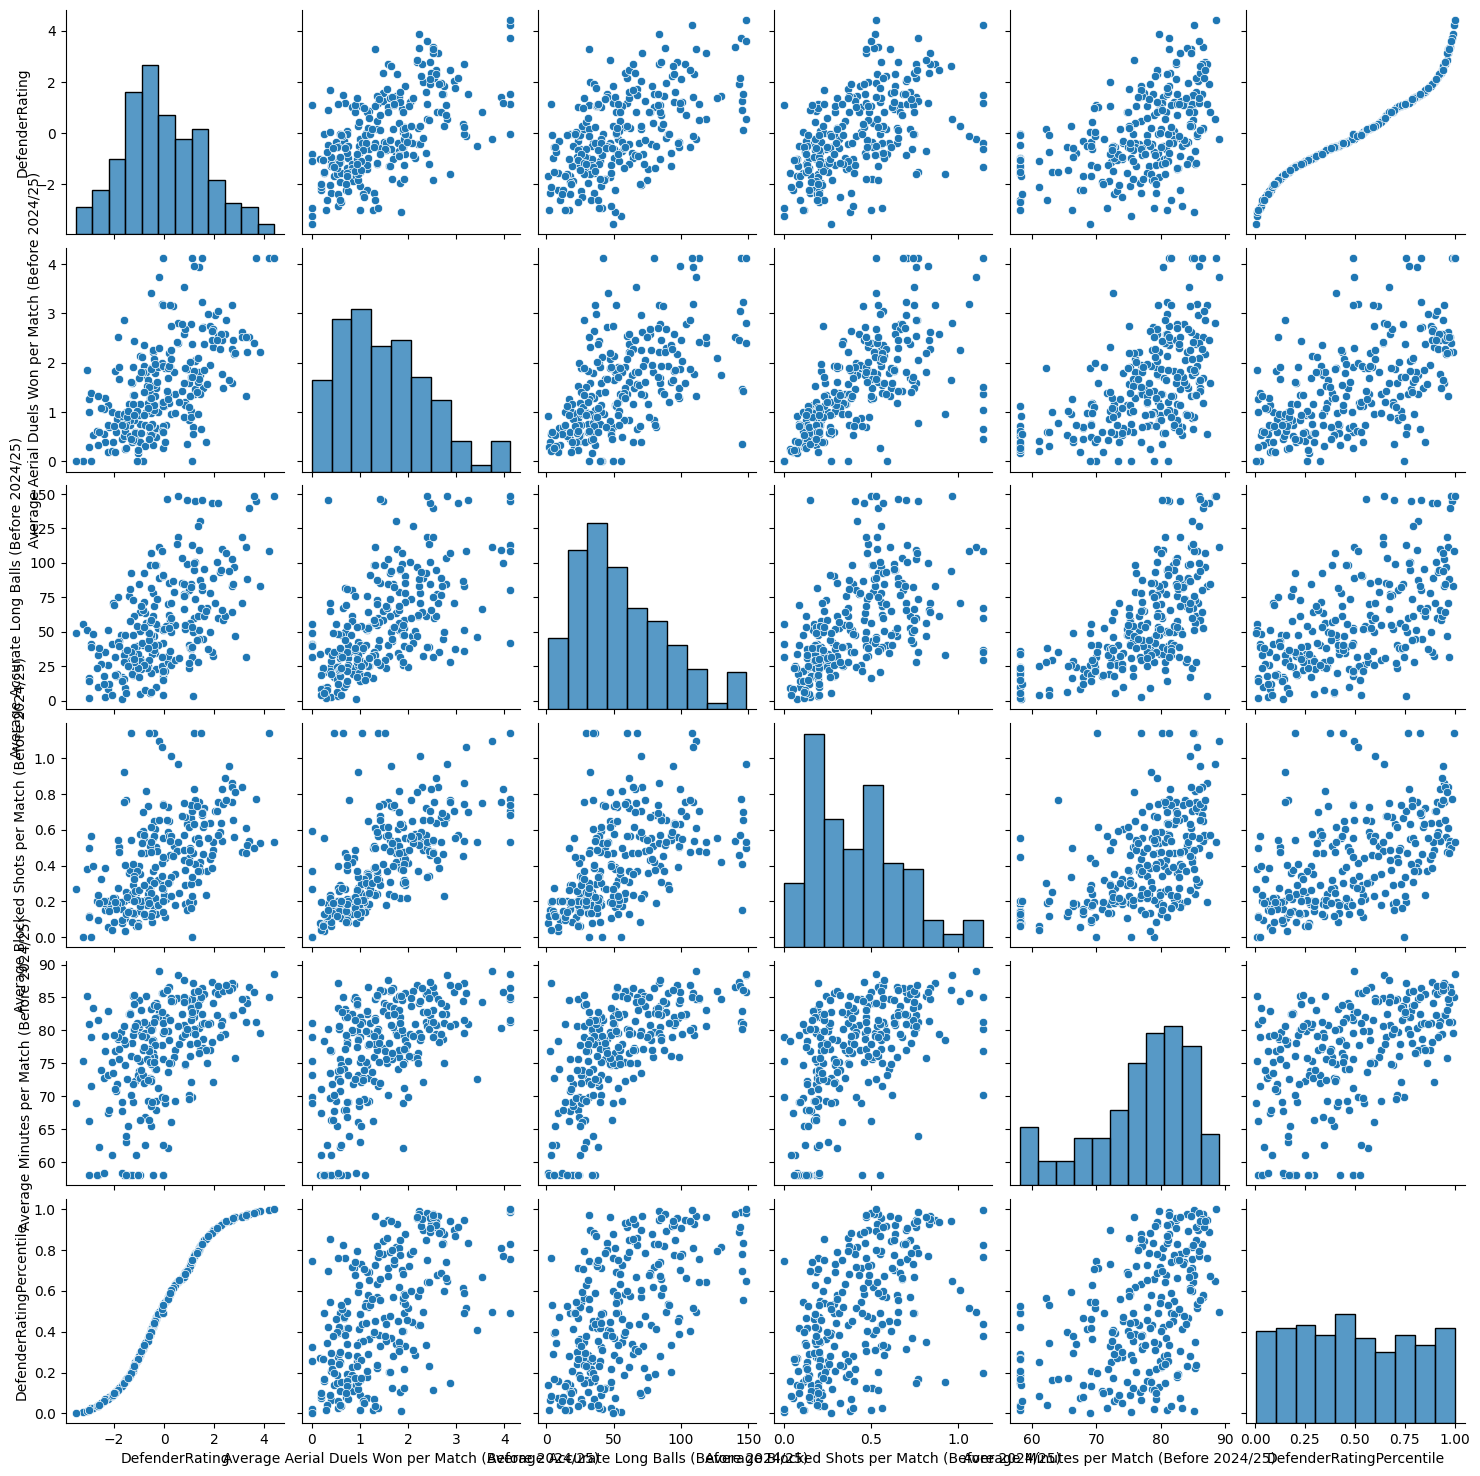

In [ ]:
top5 = corr_target.index[1:6]  # skip the target

sns.pairplot(df_out[top5.tolist() + ["DefenderRatingPercentile"]])
plt.savefig("/content/eda_4_pairplot_top5.png", dpi=300)
plt.show()


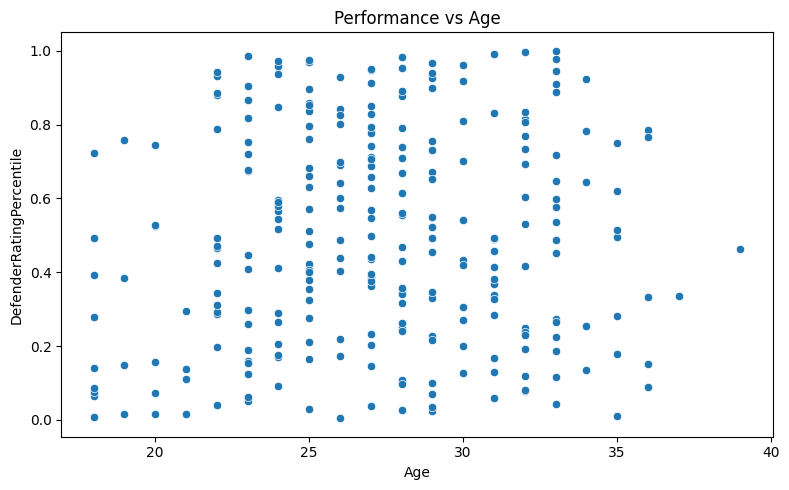

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_out, x="Age", y="DefenderRatingPercentile")
plt.title("Performance vs Age")
plt.tight_layout()
plt.savefig("/content/eda_5_age_vs_performance.png", dpi=300)
plt.show()


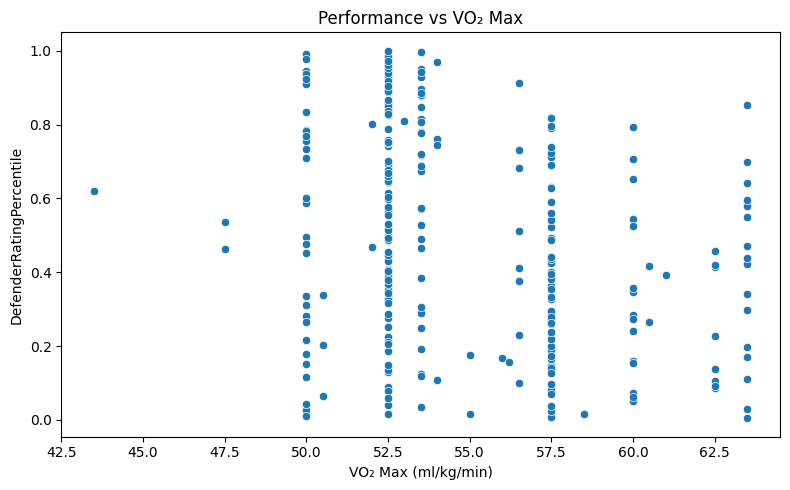

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_out, x="VO₂ Max (ml/kg/min)", y="DefenderRatingPercentile")
plt.title("Performance vs VO₂ Max")
plt.tight_layout()
plt.savefig("/content/eda_6_vo2_vs_performance.png", dpi=300)
plt.show()


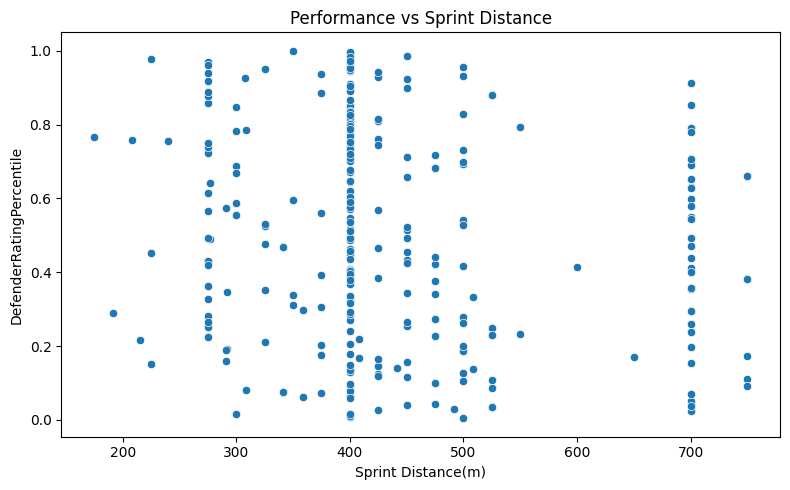

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_out, x="Sprint Distance(m)", y="DefenderRatingPercentile")
plt.title("Performance vs Sprint Distance")
plt.tight_layout()
plt.savefig("/content/eda_7_sprint_distance_vs_performance.png", dpi=300)
plt.show()


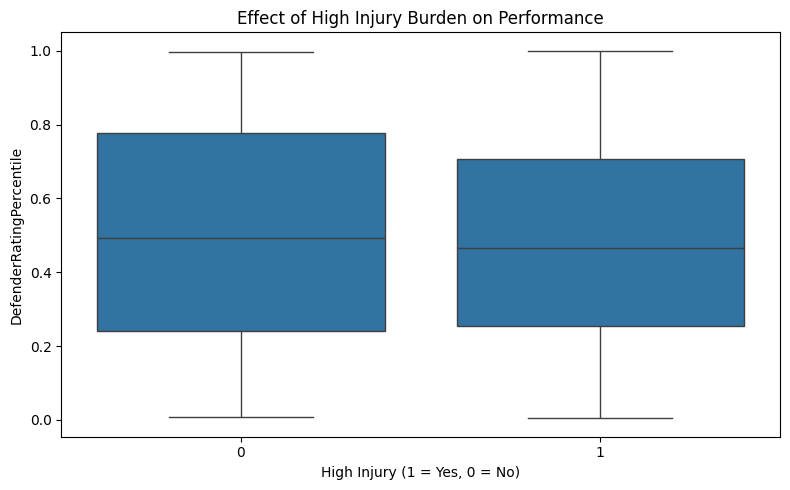

In [ ]:
df_out["HighInjury"] = (df_out["PastTotalDaysOut"] > df_out["PastTotalDaysOut"].median()).astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(data=df_out, x="HighInjury", y="DefenderRatingPercentile")
plt.title("Effect of High Injury Burden on Performance")
plt.xlabel("High Injury (1 = Yes, 0 = No)")
plt.tight_layout()
plt.savefig("/content/eda_8_injury_vs_performance.png", dpi=300)
plt.show()


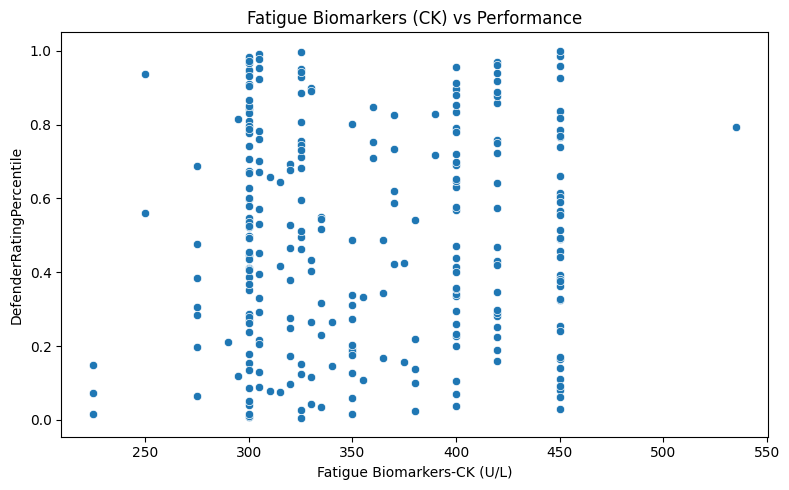

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_out, x="Fatigue Biomarkers-CK (U/L)", y="DefenderRatingPercentile")
plt.title("Fatigue Biomarkers (CK) vs Performance")
plt.tight_layout()
plt.savefig("/content/eda_9_ck_vs_performance.png", dpi=300)
plt.show()


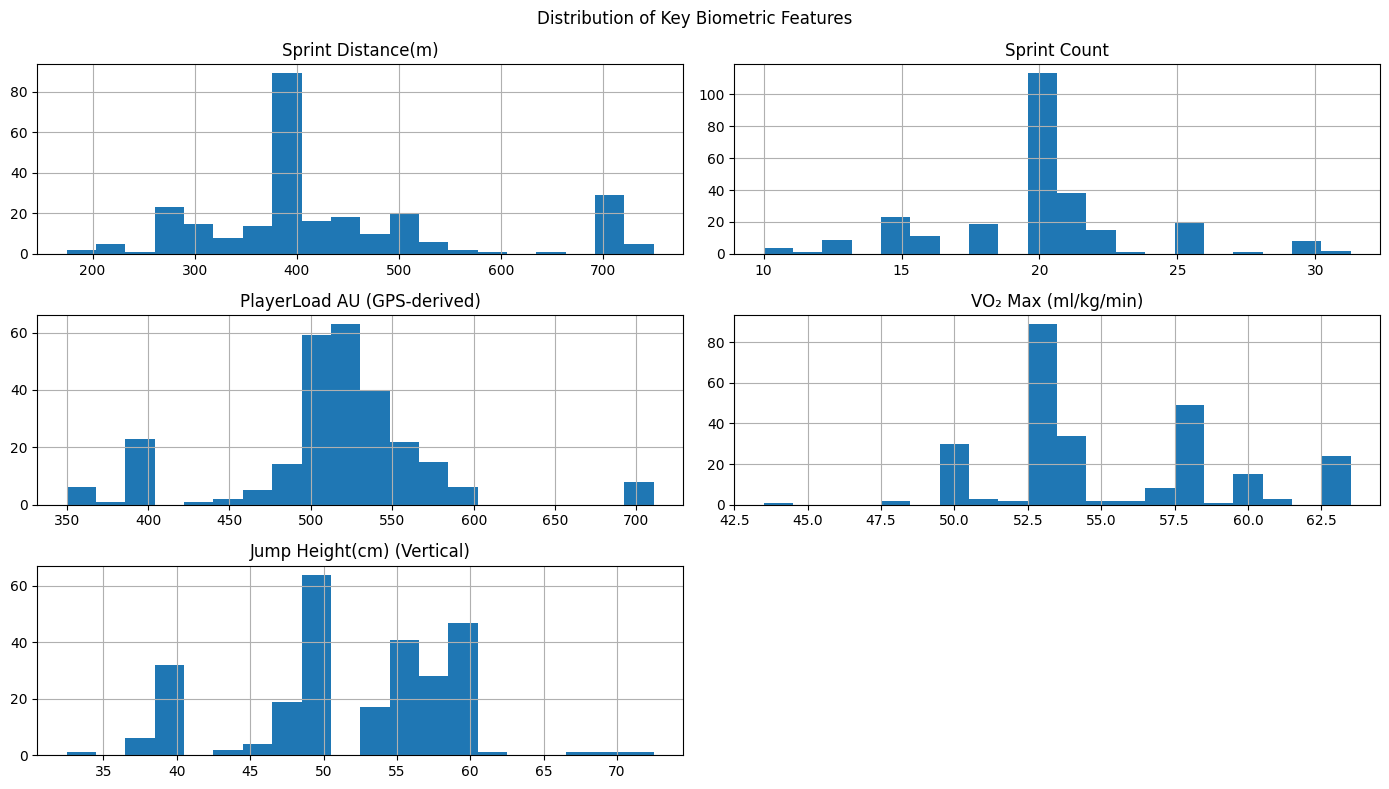

In [ ]:
key_bio = [
    "Sprint Distance(m)",
    "Sprint Count",
    "PlayerLoad AU (GPS-derived)",
    "VO₂ Max (ml/kg/min)",
    "Jump Height(cm) (Vertical)"
]

df_out[key_bio].hist(figsize=(14,8), bins=20)
plt.suptitle("Distribution of Key Biometric Features")
plt.tight_layout()
plt.savefig("/content/eda_10_key_biometric_distributions.png", dpi=300)
plt.show()


***trai/test split***

In [ ]:
target_col = "DefenderRatingPercentile"
df_model_mc = df_out.dropna(subset=[target_col]).copy()
y_mc = df_model_mc[target_col]

drop_for_X_mc = [target_col]
if "DefenderRating" in df_model_mc.columns:
    drop_for_X_mc.append("DefenderRating")

X_full_mc = df_model_mc.drop(columns=drop_for_X_mc)

In [ ]:
top_features = corr_target.drop(['DefenderRatingPercentile', 'DefenderRating'], errors='ignore').head(10).index.tolist()
X_mc = X_full_mc[top_features]

X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X_mc, y_mc, test_size=0.2, random_state=42
)

results = []  # to store metrics for each model

In [ ]:
# Helper to compute metrics (no fitting here, just metric calc & logging)
def compute_metrics(y_true, y_pred, name):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)

    print(f"\n=== {name} ===")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    })

***Model implimentation***

In [ ]:
!pip install catboost
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
# 1) Random Forest Regressor
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_model.fit(X_train_mc, y_train_mc)
rf_preds = rf_model.predict(X_test_mc)

compute_metrics(y_test_mc, rf_preds, "Random Forest Regressor")



=== Random Forest Regressor ===
MAE:  0.1695
RMSE: 0.2105
R²:   0.4221


In [ ]:
# 2) XGBoost Regressor
# -----------------------------
xgb_model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_mc, y_train_mc)
xgb_preds = xgb_model.predict(X_test_mc)

compute_metrics(y_test_mc, xgb_preds, "XGBoost Regressor")


=== XGBoost Regressor ===
MAE:  0.1852
RMSE: 0.2329
R²:   0.2926


In [ ]:
# -----------------------------
# 3) LightGBM Regressor
# -----------------------------
lgbm_model = LGBMRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgbm_model.fit(X_train_mc, y_train_mc)
lgbm_preds = lgbm_model.predict(X_test_mc)

compute_metrics(y_test_mc, lgbm_preds, "LightGBM Regressor")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 10
[LightGBM] [Info] Start training from score 0.485625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
!pip install catboost

In [ ]:
# 4) CatBoost Regressor
# -----------------------------
cat_model = CatBoostRegressor(
    iterations=400,
    depth=6,
    learning_rate=0.03,
    loss_function="RMSE",
    random_state=42,
    verbose=False
)

cat_model.fit(X_train_mc, y_train_mc)
cat_preds = cat_model.predict(X_test_mc)

compute_metrics(y_test_mc, cat_preds, "CatBoost Regressor")



=== CatBoost Regressor ===
MAE:  0.1750
RMSE: 0.2162
R²:   0.3906


In [ ]:
# 5) Linear Regression (with scaling)
# -----------------------------
scaler_lr = StandardScaler()
X_train_lr = scaler_lr.fit_transform(X_train_mc)
X_test_lr  = scaler_lr.transform(X_test_mc)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_mc)
lr_preds = lr_model.predict(X_test_lr)

compute_metrics(y_test_mc, lr_preds, "Linear Regression")


=== Linear Regression ===
MAE:  0.1810
RMSE: 0.2136
R²:   0.4053


In [ ]:
# 6) ElasticNet Regression (with scaling)
# -----------------------------
scaler_en = StandardScaler()
X_train_en = scaler_en.fit_transform(X_train_mc)
X_test_en  = scaler_en.transform(X_test_mc)

elastic_model = ElasticNet(
    alpha=0.001,
    l1_ratio=0.5,
    random_state=42
)

elastic_model.fit(X_train_en, y_train_mc)
elastic_preds = elastic_model.predict(X_test_en)

compute_metrics(y_test_mc, elastic_preds, "ElasticNet Regression")



=== ElasticNet Regression ===
MAE:  0.1810
RMSE: 0.2133
R²:   0.4067


In [ ]:
# 1) Random Forest Regressor (Tuned)
# ---------------------------------
rf_tuned_model = RandomForestRegressor(
    n_estimators=500, # Increased from 300
    max_depth=10,     # Added max_depth
    min_samples_leaf=5, # Added min_samples_leaf
    random_state=42
)
rf_tuned_model.fit(X_train_mc, y_train_mc)
rf_tuned_preds = rf_tuned_model.predict(X_test_mc)
compute_metrics(y_test_mc, rf_tuned_preds, "Random Forest Regressor (Tuned)")

# 2) XGBoost Regressor (Tuned)
# -----------------------------
xgb_tuned_model = XGBRegressor(
    n_estimators=600,  # Increased from 400
    learning_rate=0.03, # Decreased from 0.05
    max_depth=6,       # Increased from 5
    subsample=0.7,     # Adjusted
    colsample_bytree=0.7, # Adjusted
    random_state=42
)
xgb_tuned_model.fit(X_train_mc, y_train_mc)
xgb_tuned_preds = xgb_tuned_model.predict(X_test_mc)
compute_metrics(y_test_mc, xgb_tuned_preds, "XGBoost Regressor (Tuned)")

# 3) LightGBM Regressor (Tuned)
# -----------------------------
lgbm_tuned_model = LGBMRegressor(
    n_estimators=600,  # Increased from 400
    learning_rate=0.03, # Decreased from 0.05
    num_leaves=60,     # Added/Adjusted num_leaves
    random_state=42
)
lgbm_tuned_model.fit(X_train_mc, y_train_mc)
lgbm_tuned_preds = lgbm_tuned_model.predict(X_test_mc)
compute_metrics(y_test_mc, lgbm_tuned_preds, "LightGBM Regressor (Tuned)")

# 4) CatBoost Regressor (Tuned)
# -----------------------------
cat_tuned_model = CatBoostRegressor(
    iterations=600,      # Increased from 400
    depth=8,             # Increased from 6
    learning_rate=0.02,  # Decreased from 0.03
    loss_function="RMSE",
    random_state=42,
    verbose=False
)
cat_tuned_model.fit(X_train_mc, y_train_mc)
cat_tuned_preds = cat_tuned_model.predict(X_test_mc)
compute_metrics(y_test_mc, cat_tuned_preds, "CatBoost Regressor (Tuned)")

results_df = pd.DataFrame(results).sort_values(by="RMSE").reset_index(drop=True)
print("\nUpdated Model comparison on predicting 24/25 DefenderRatingPercentile:")
print(results_df)



=== Random Forest Regressor (Tuned) ===
MAE:  0.1712
RMSE: 0.2121
R²:   0.4136

=== XGBoost Regressor (Tuned) ===
MAE:  0.1794
RMSE: 0.2246
R²:   0.3420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 10
[LightGBM] [Info] Start training from score 0.485625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="RMSE").reset_index(drop=True)

print("\nModel comparison on predicting 24/25 DefenderRatingPercentile:")
print(results_df)


Model comparison on predicting 24/25 DefenderRatingPercentile:
                             Model       MAE      RMSE  R² Score
0          Random Forest Regressor  0.169485  0.210538  0.422053
1  Random Forest Regressor (Tuned)  0.171154  0.212070  0.413614
2            ElasticNet Regression  0.180959  0.213313  0.406717
3                Linear Regression  0.180987  0.213576  0.405251
4               CatBoost Regressor  0.175025  0.216188  0.390620
5       CatBoost Regressor (Tuned)  0.174758  0.217510  0.383144
6       LightGBM Regressor (Tuned)  0.177588  0.219509  0.371750
7               LightGBM Regressor  0.177837  0.220041  0.368704
8        XGBoost Regressor (Tuned)  0.179359  0.224648  0.341994
9                XGBoost Regressor  0.185230  0.232923  0.292622


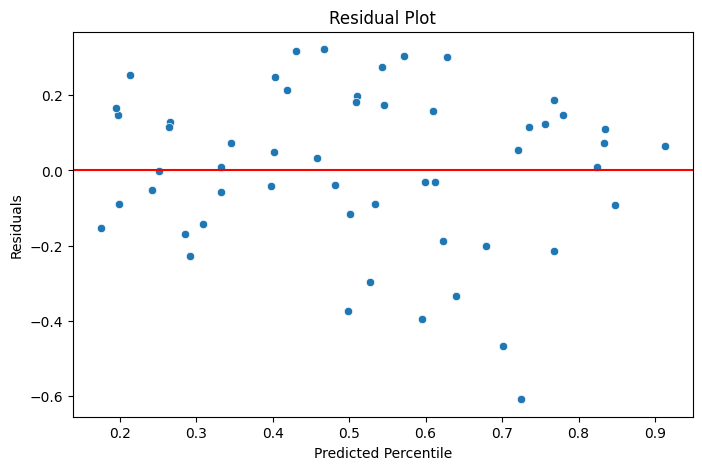

In [ ]:
rf_model = rf_model.predict(X_test_mc)
rf_residuals = y_test_mc - rf_model

plt.figure(figsize=(8,5))
sns.scatterplot(x=rf_model, y=rf_residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Percentile")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


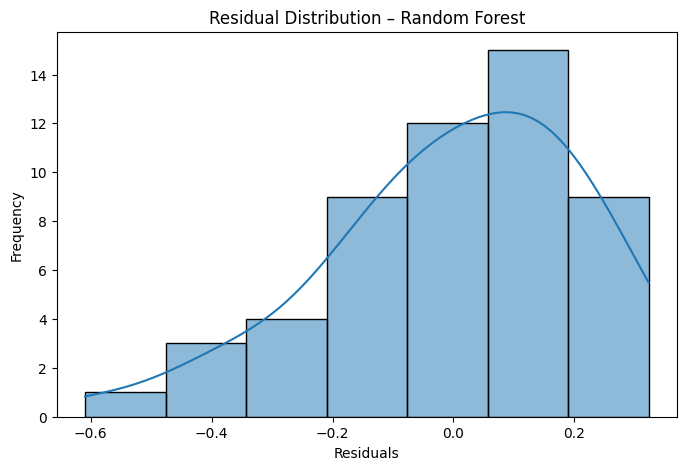

In [ ]:
rf_residuals = y_test_mc - rf_preds

plt.figure(figsize=(8,5))
sns.histplot(rf_residuals, kde=True)
plt.title("Residual Distribution – Random Forest") # Changed title for clarity
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


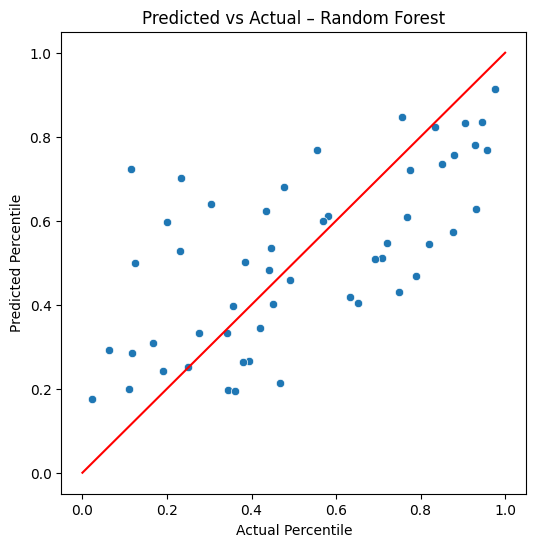

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_mc, y=rf_preds)
plt.plot([0,1], [0,1], color='red')
plt.xlabel("Actual Percentile")
plt.ylabel("Predicted Percentile")
plt.title("Predicted vs Actual – Random Forest")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Re-instantiate and re-fit the Random Forest Regressor
# as the 'rf_model' variable was overwritten in a previous cell
# and now holds predictions (a numpy array).
# In a real scenario, it's best practice to avoid overwriting model objects.
rf_model_for_importances = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_model_for_importances.fit(X_train_mc, y_train_mc)

importances = rf_model_for_importances.feature_importances_
feat_imp = pd.Series(importances, index=X_mc.columns).sort_values(ascending=False)
print(feat_imp.head(55))

Average Blocked Shots per Match (Before 2024/25)       0.210997
Average Aerial Duels Won per Match (Before 2024/25)    0.203947
Average Accurate Long Balls (Before 2024/25)           0.128833
Average Accurate Crosses (Before 2024/25)              0.089279
Average Interceptions per Match (Before 2024/25)       0.074788
Average Minutes per Match (Before 2024/25)             0.068922
Average Sofascore Rating (Before 2024/25)              0.065952
Average Accurate Passes (Before 2024/25)               0.055725
Height(m)                                              0.054969
Average Clean Sheets per Match (Before 2024/25)        0.046587
dtype: float64


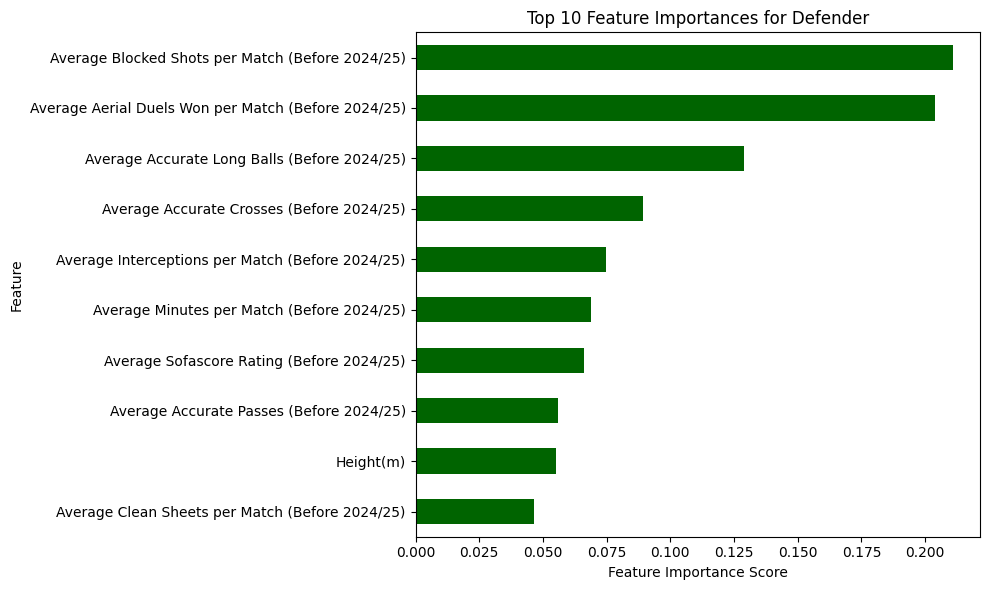

In [ ]:
plt.figure(figsize=(10,6))
feat_imp.head(10).plot(kind='barh', color='darkgreen')
plt.title('Top 10 Feature Importances for Defender')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # To display the most important feature at the top
plt.tight_layout()
plt.savefig('/content/rf_top10_feature_importances.png', dpi=300)
plt.show()

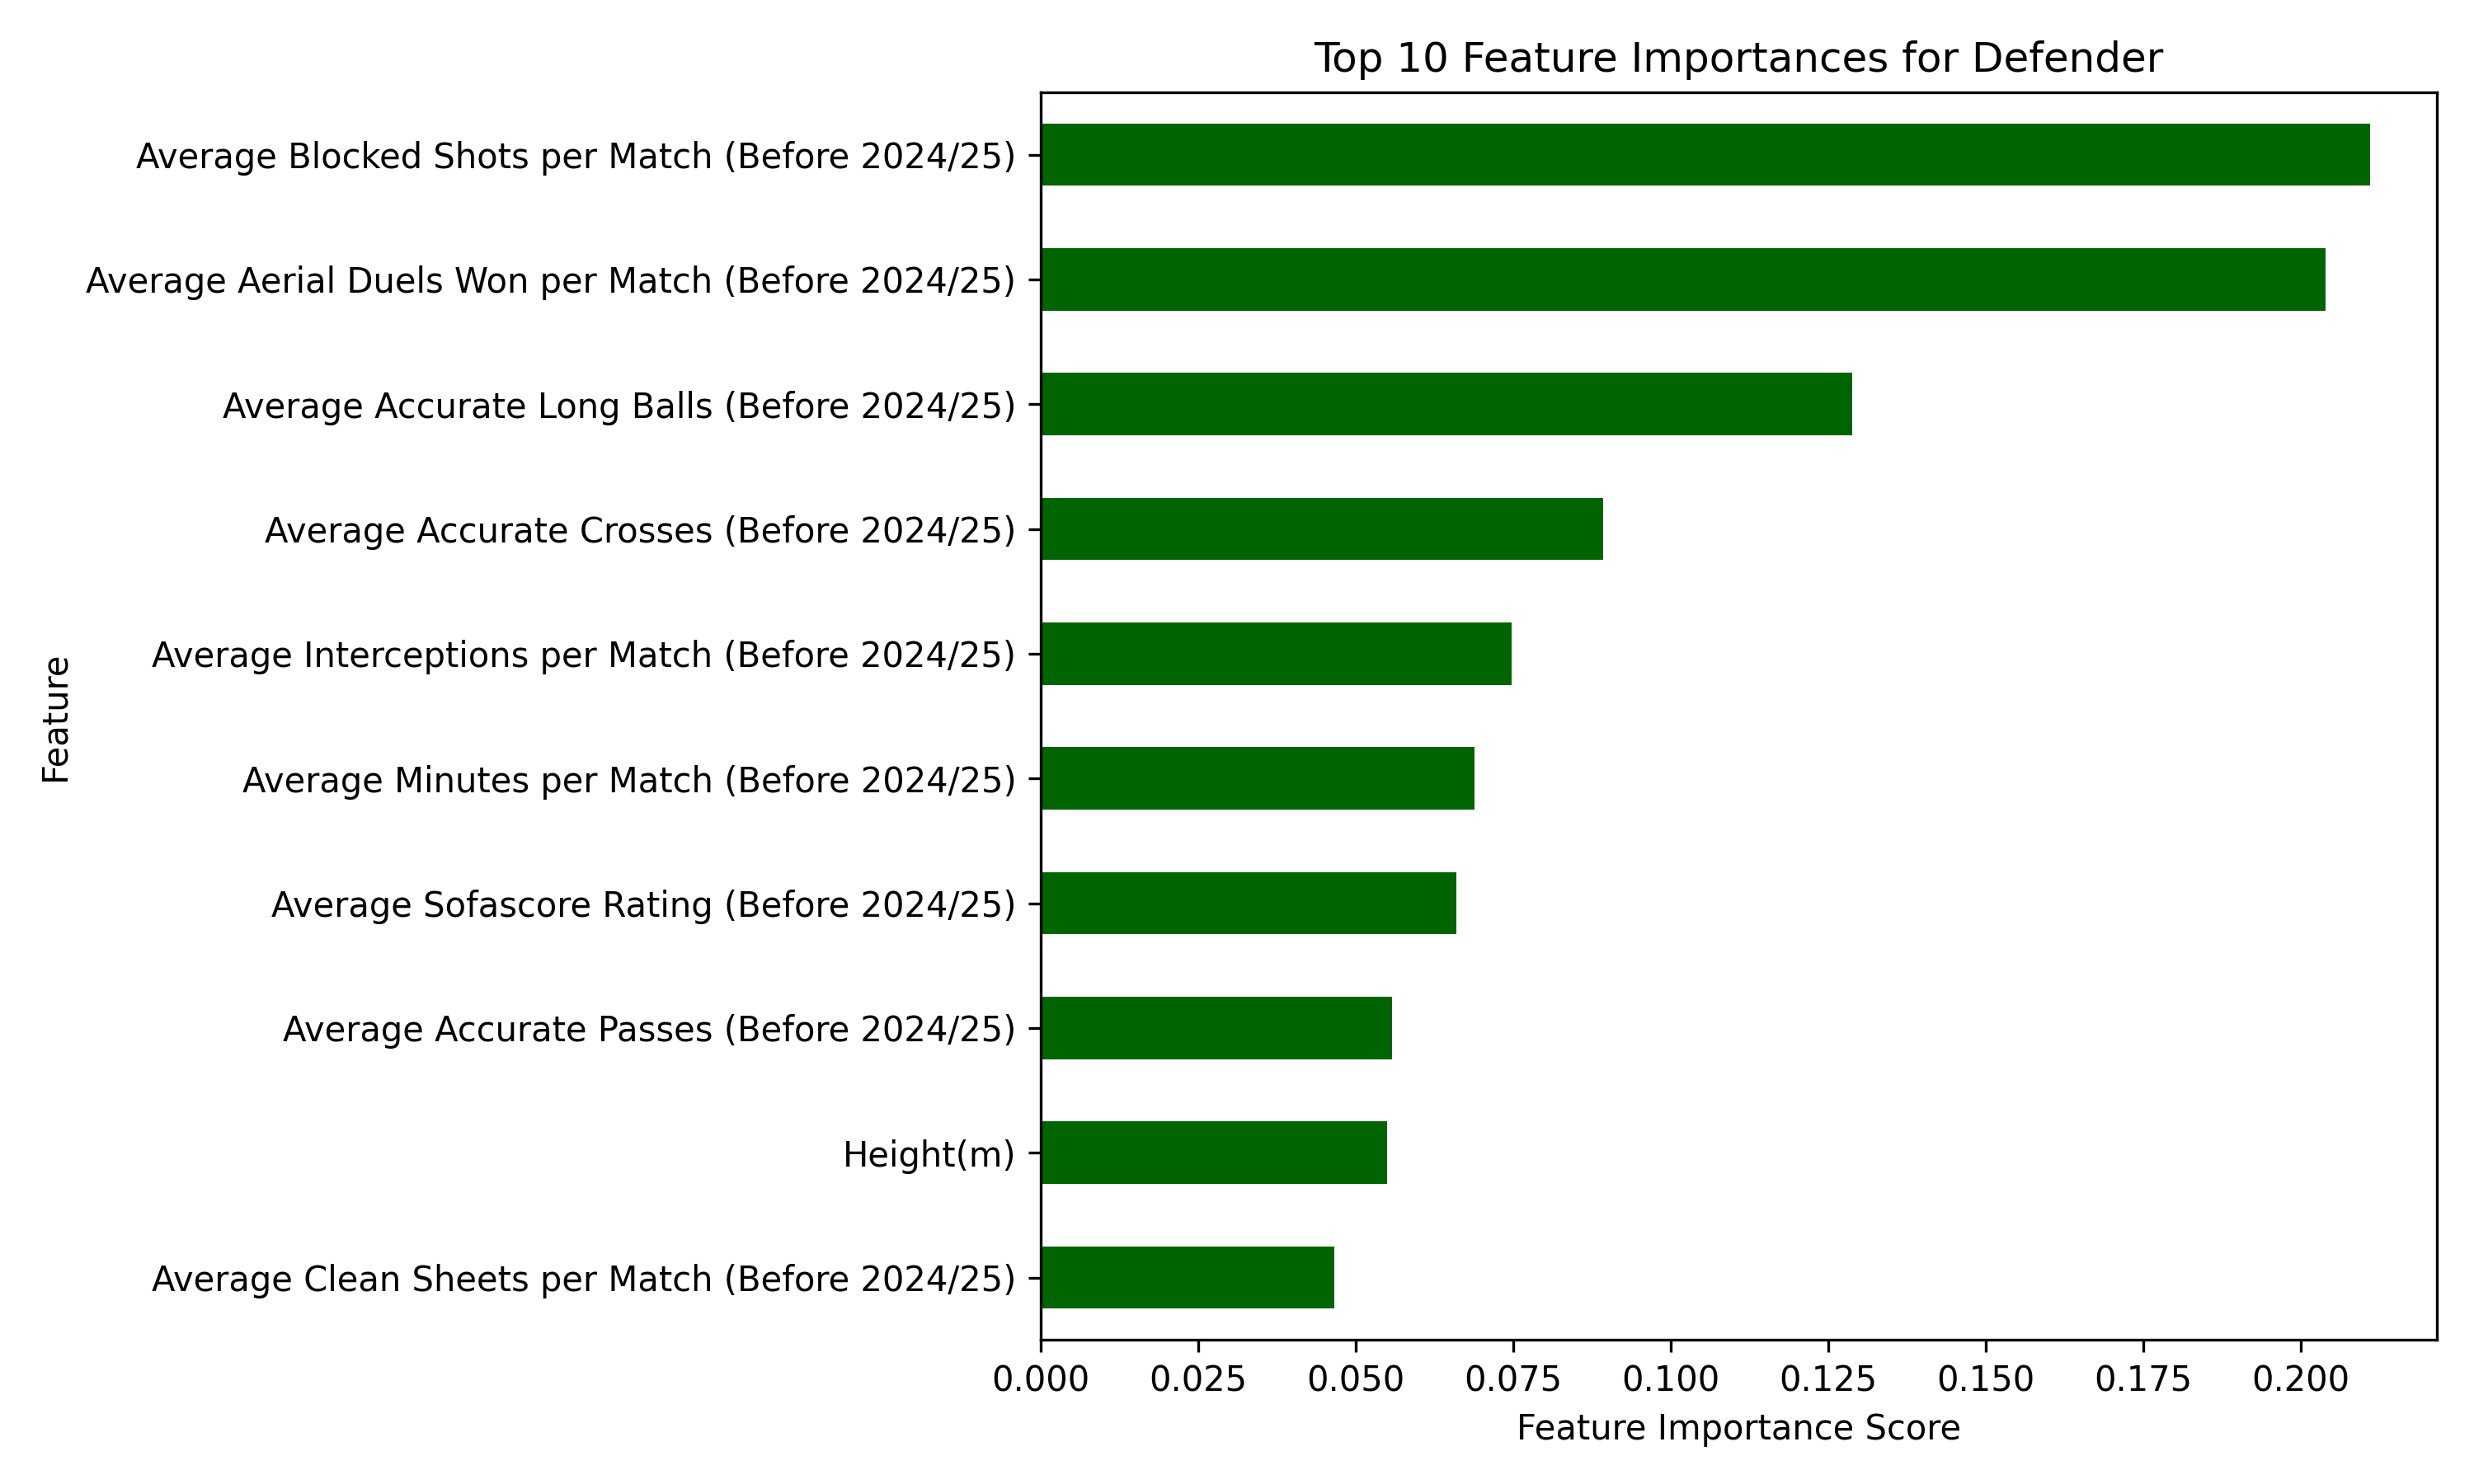

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/rf_top10_feature_importances.png'))

In [ ]:
import shap
import matplotlib.pyplot as plt

# rf_final should be your final RF model (e.g. rf_final = rf_base)
rf_final = rf_model_for_importances # Assigning the best performing Random Forest model
explainer = shap.TreeExplainer(rf_final)
shap_values = explainer.shap_values(X_train_mc)

# -------- SHAP SUMMARY DOT PLOT --------
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_mc, show=False)
plt.tight_layout()
plt.savefig("shap_summary_dot.png", dpi=300, bbox_inches="tight")
plt.close()

# -------- SHAP SUMMARY BAR PLOT --------
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_train_mc, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("shap_summary_bar.png", dpi=300, bbox_inches="tight")
plt.close()

print("Saved:")
print(" - shap_summary_dot.png")
print(" - shap_summary_bar.png")

Saved:
 - shap_summary_dot.png
 - shap_summary_bar.png


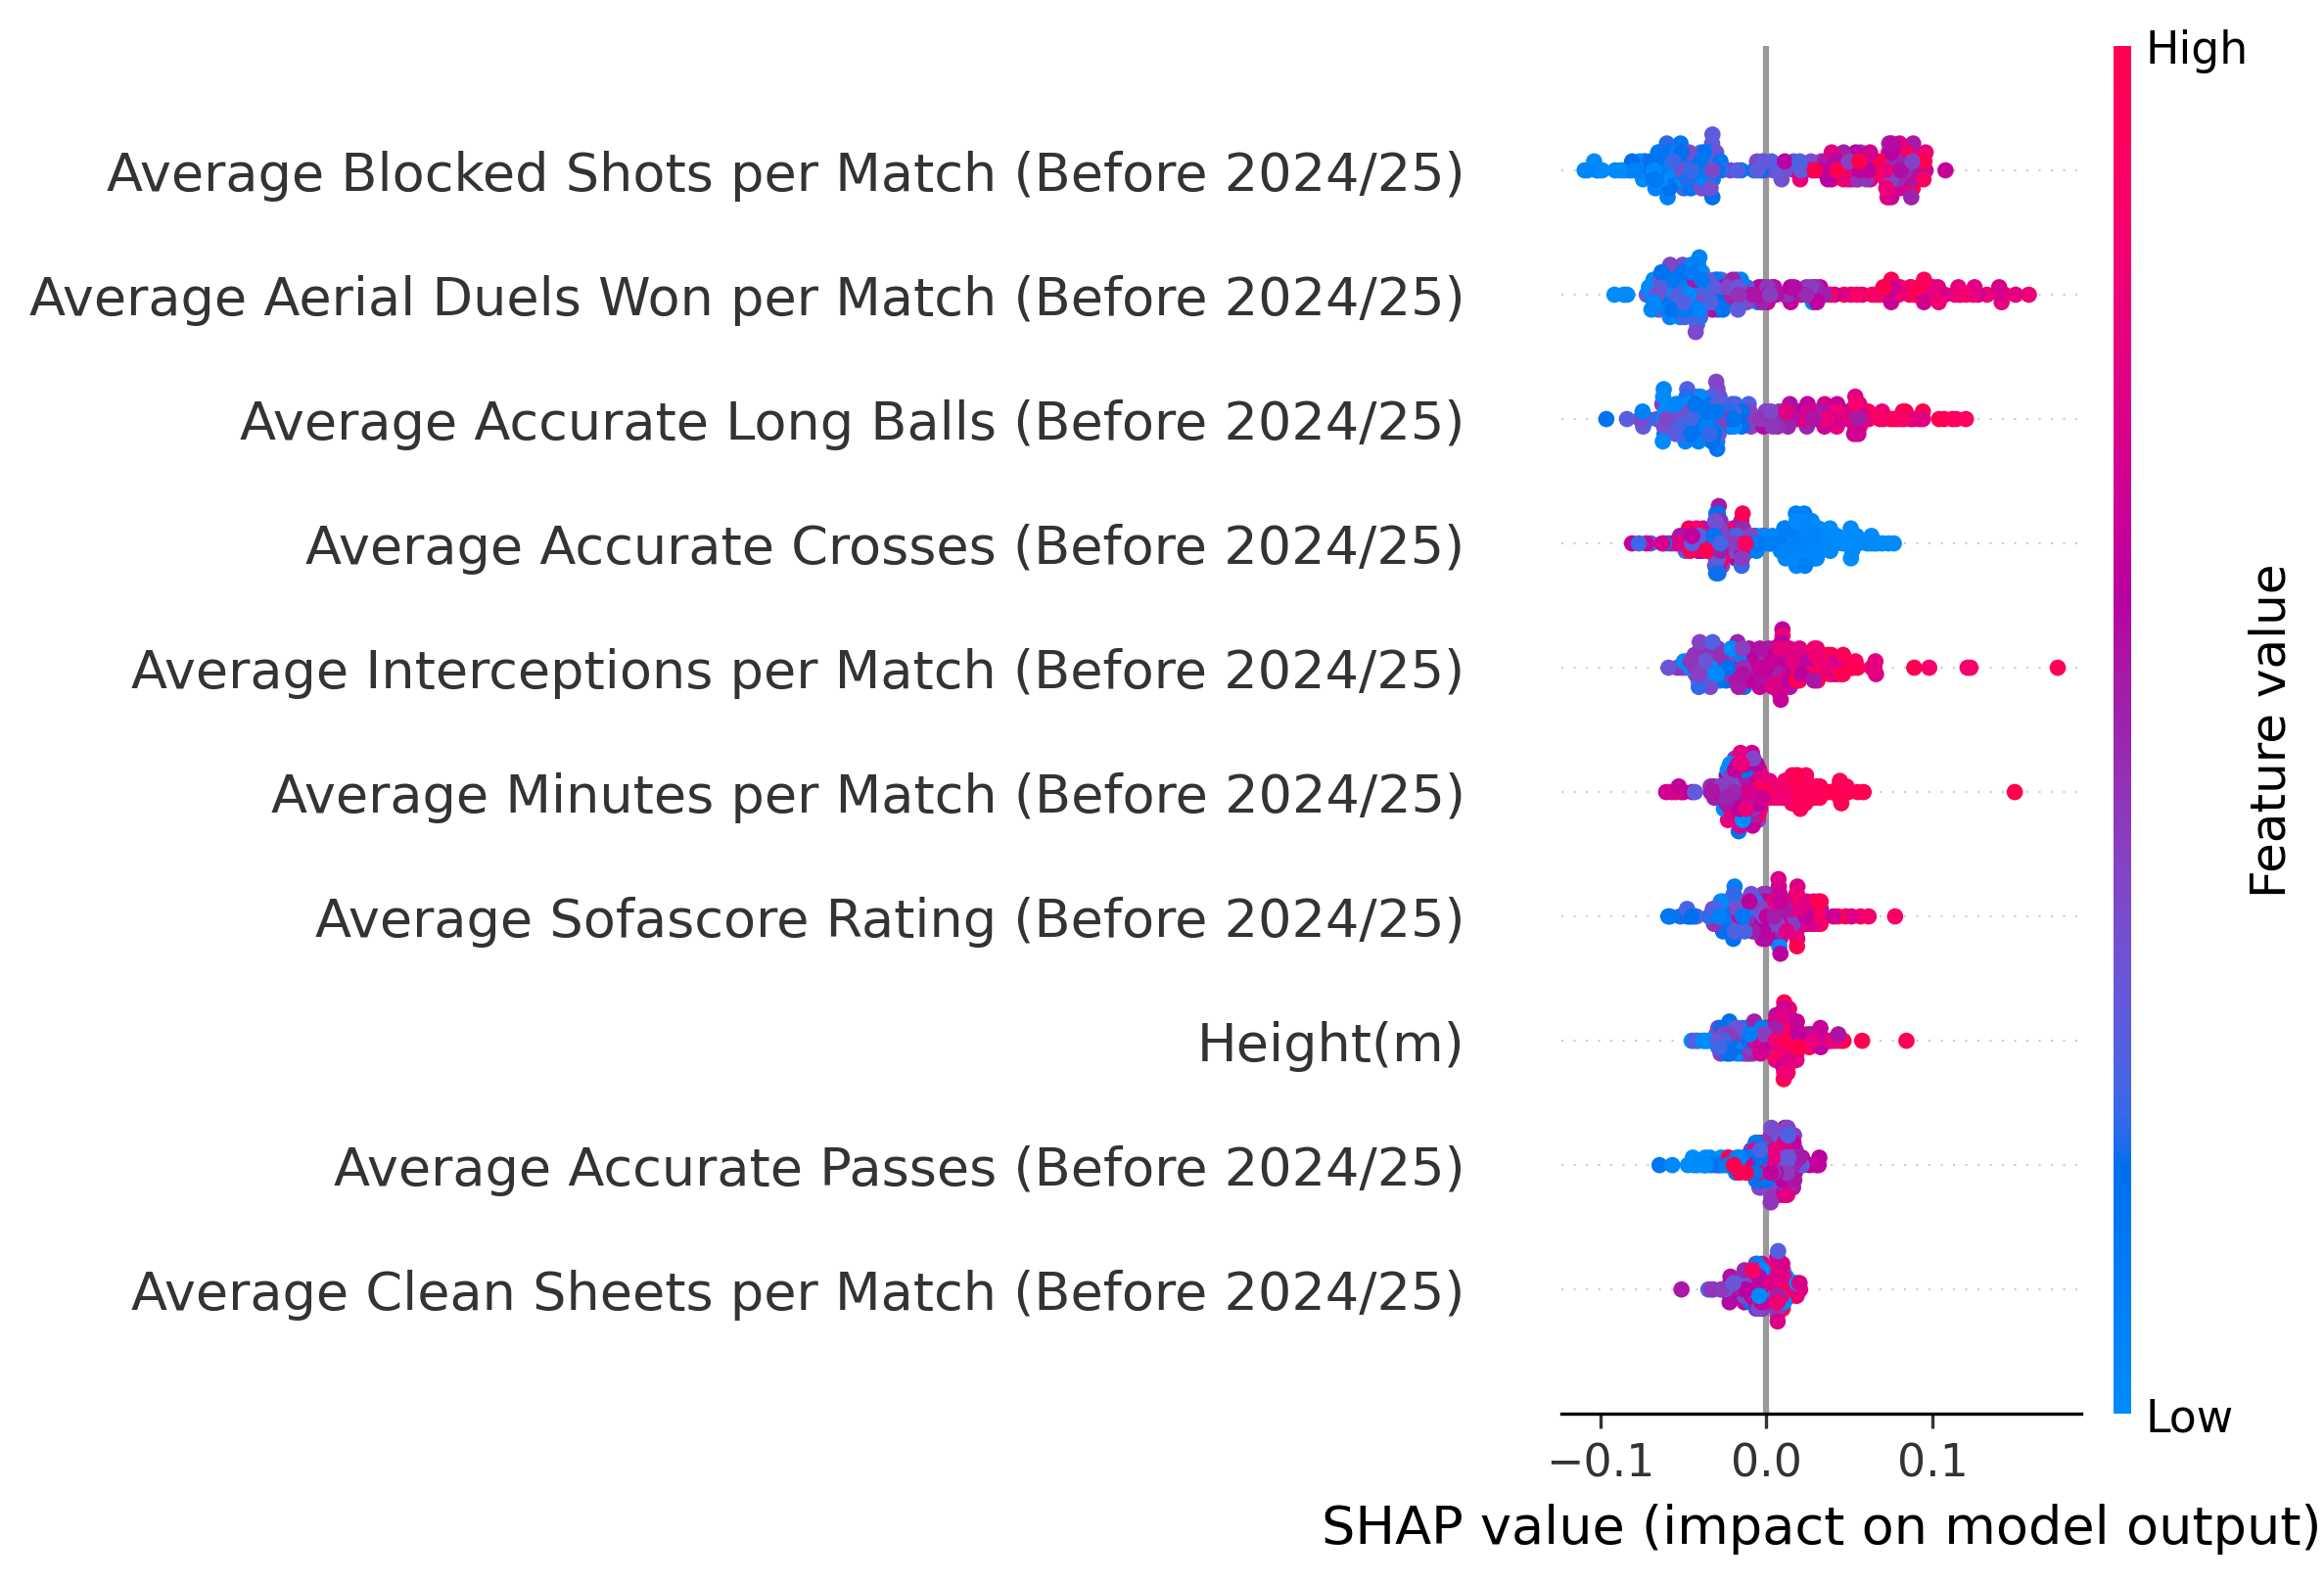

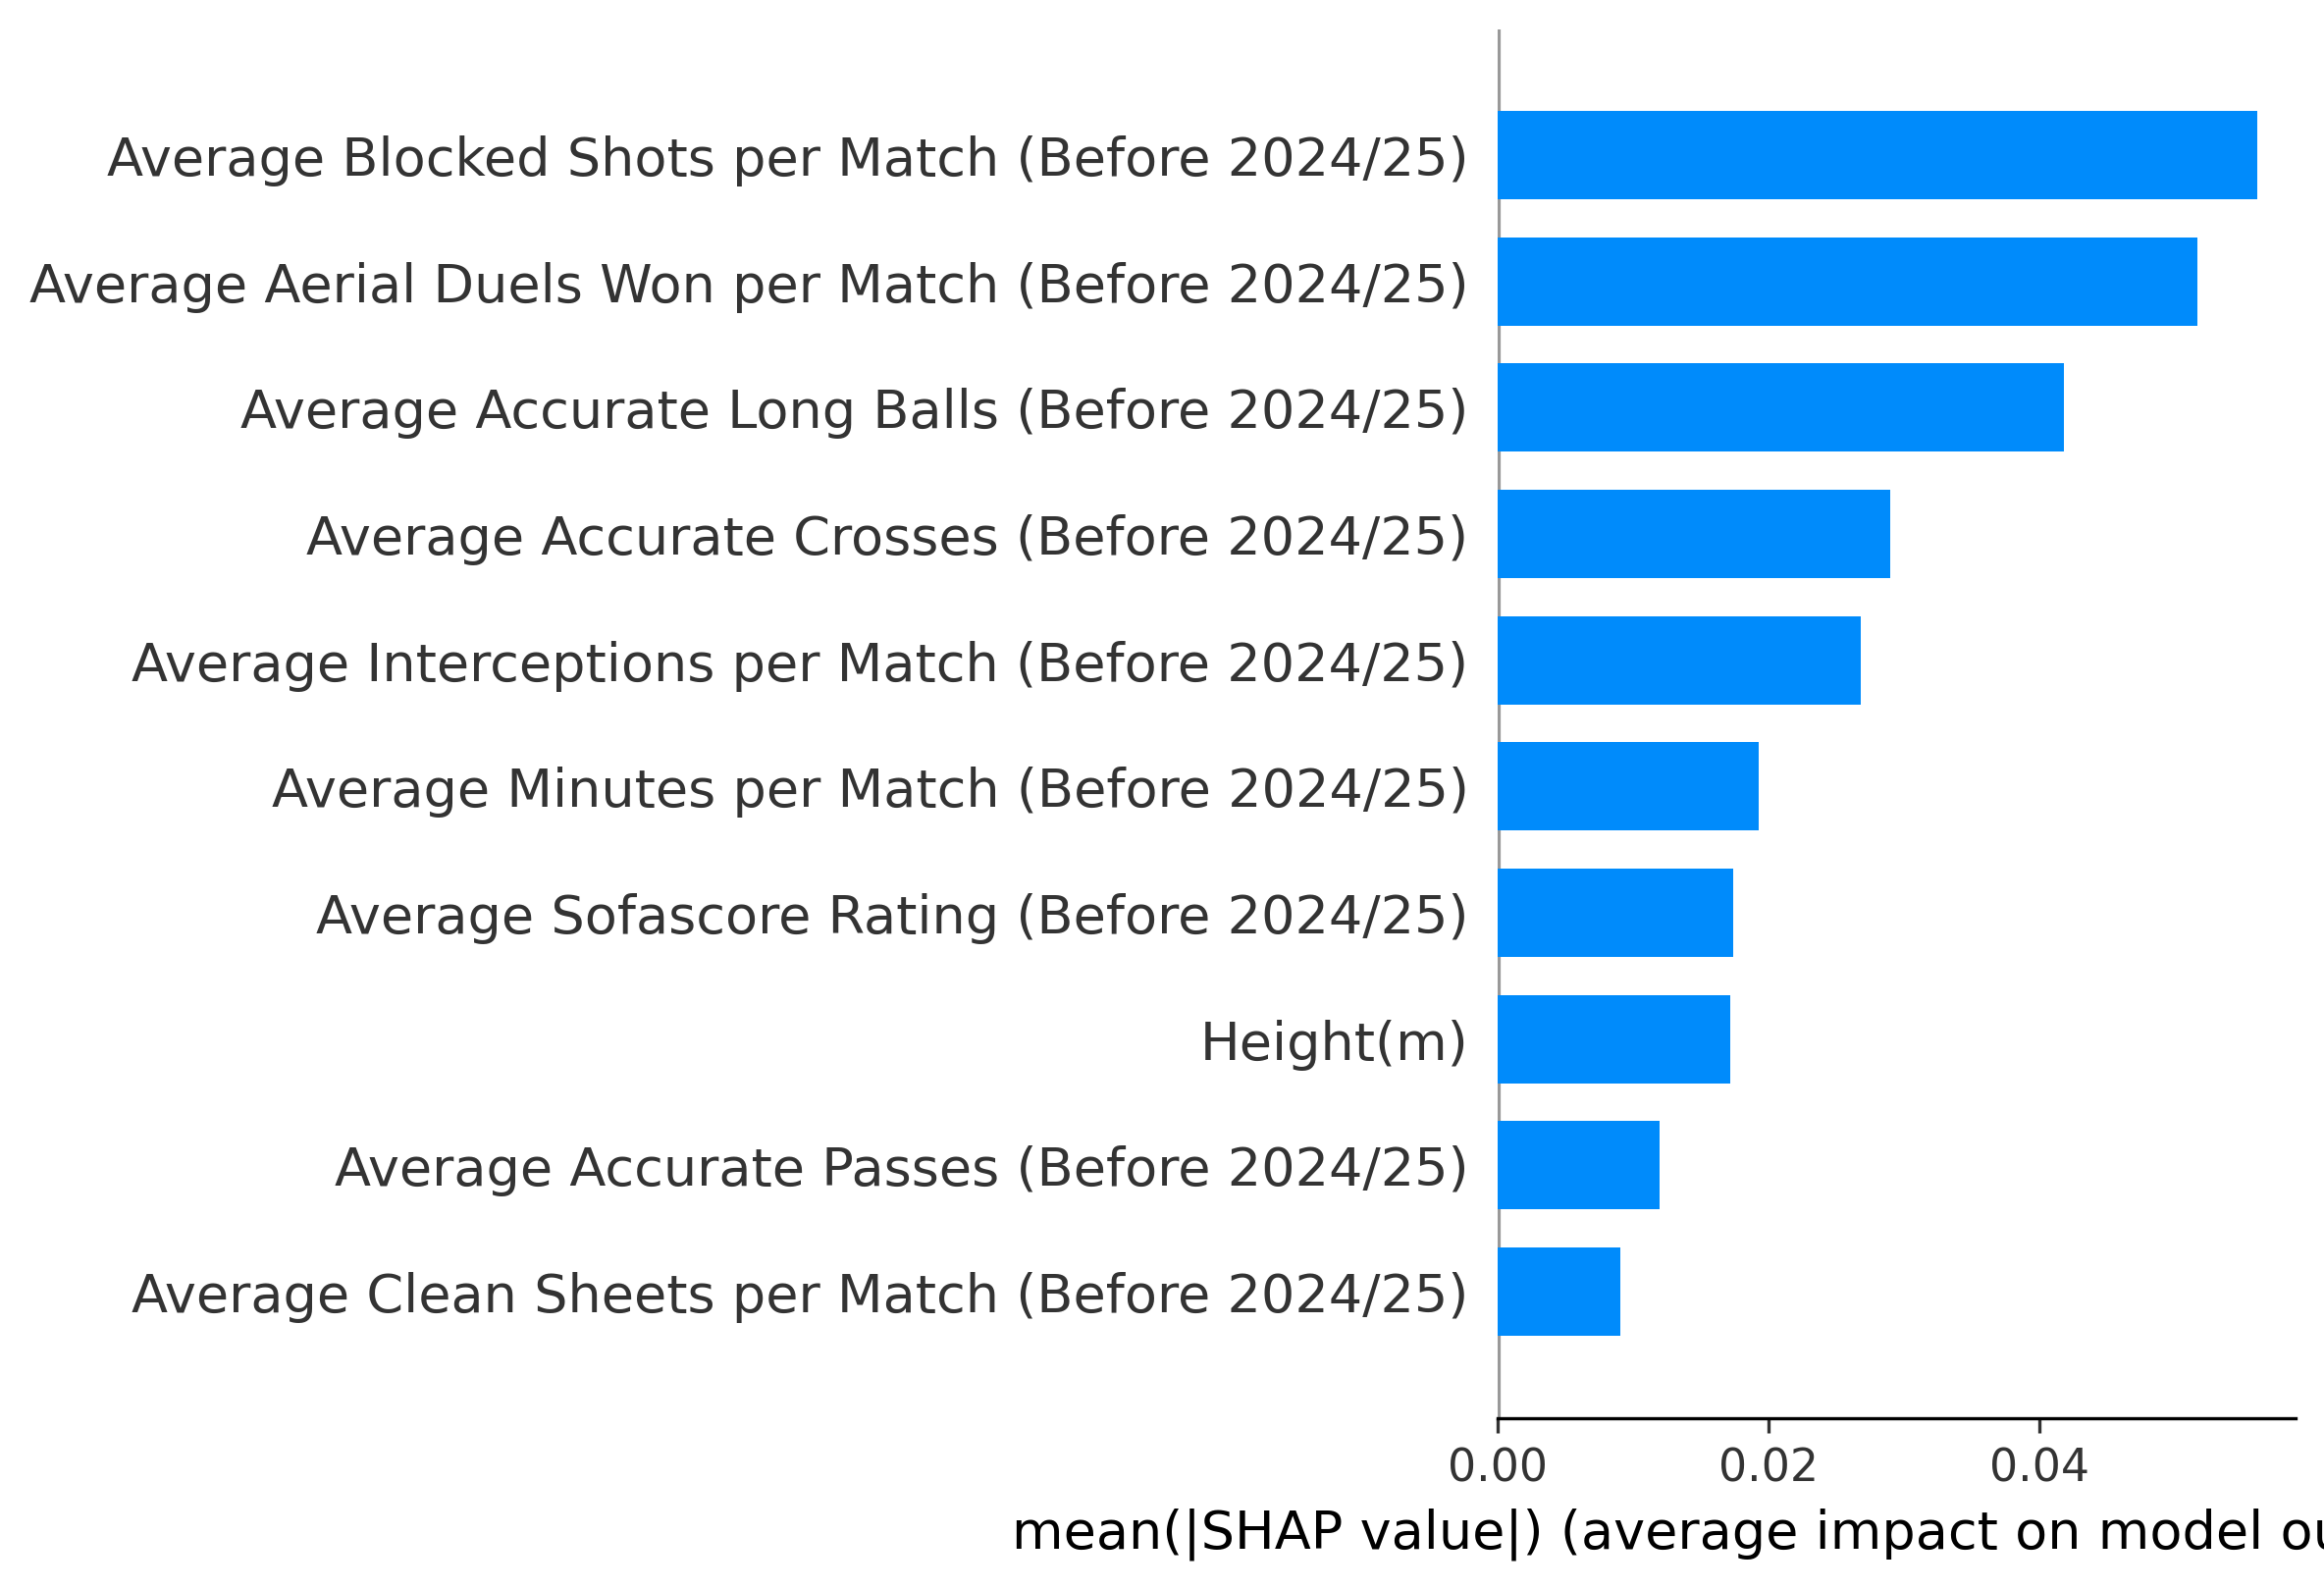

In [ ]:
from IPython.display import Image, display

display(Image(filename="shap_summary_dot.png"))
display(Image(filename="shap_summary_bar.png"))

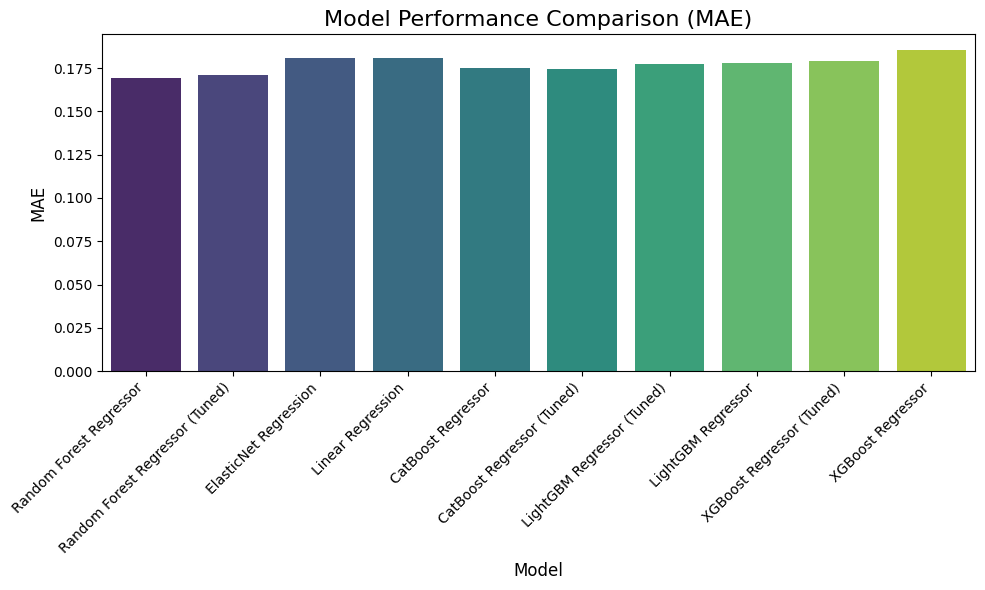

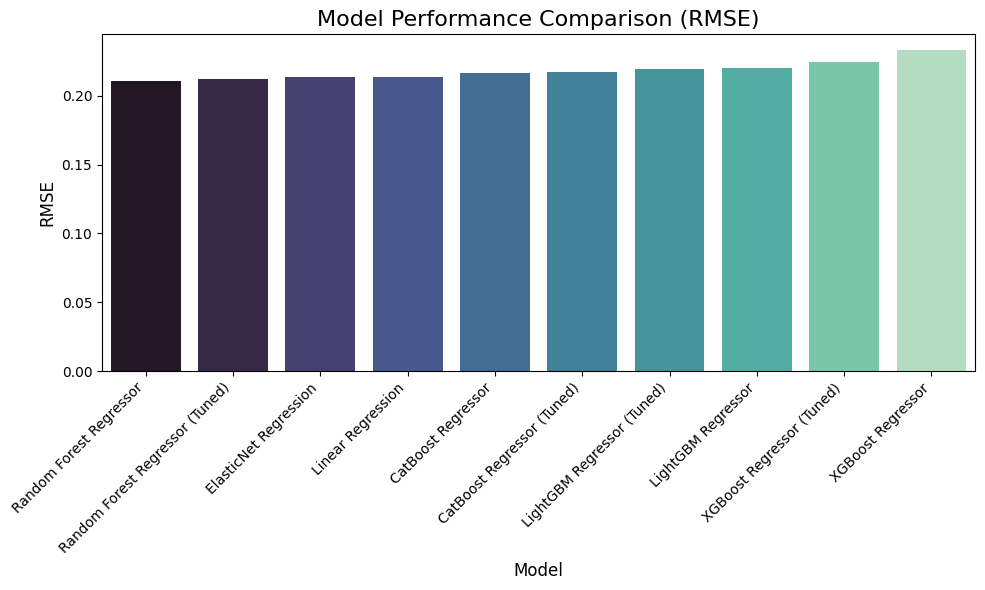

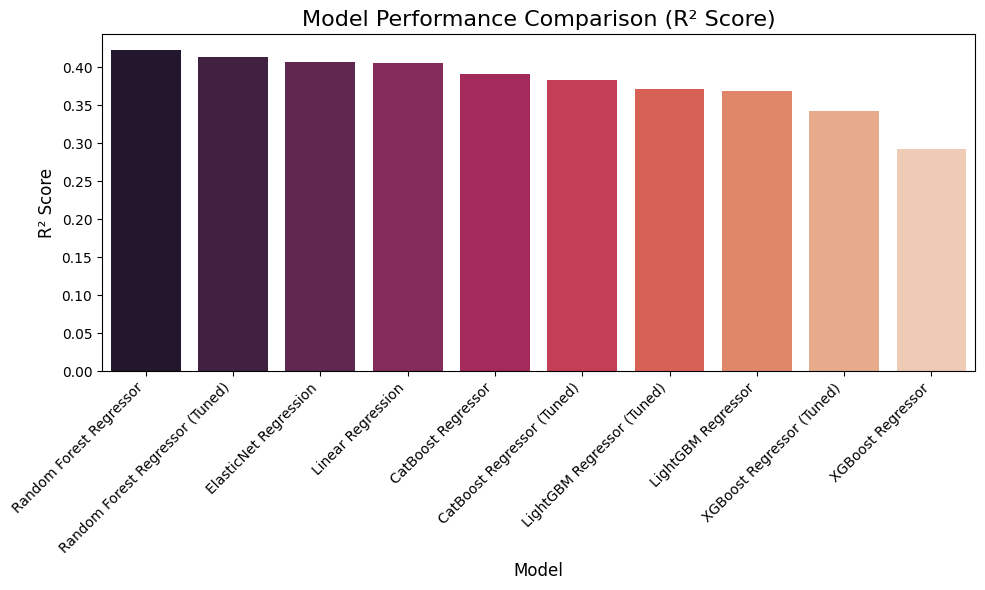

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is available from previous cells
df_compare = results_df.copy()

# Plotting MAE
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MAE", data=df_compare, palette="viridis")
plt.title("Model Performance Comparison (MAE)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=df_compare, palette="mako")
plt.title("Model Performance Comparison (RMSE)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting R² Score
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R² Score", data=df_compare, palette="rocket")
plt.title("Model Performance Comparison (R² Score)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig("/content/model_comparison.png", dpi=300)
plt.show()


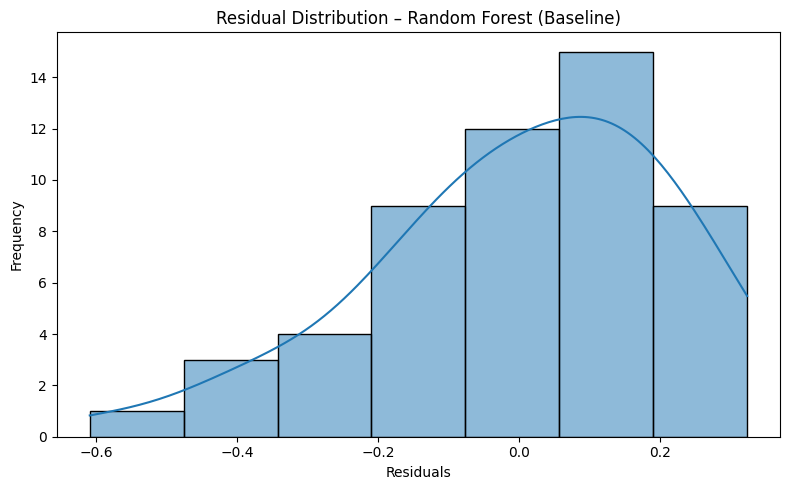

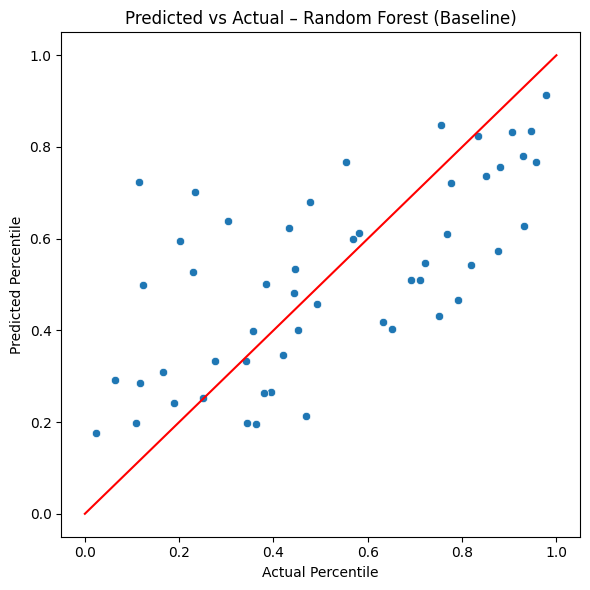

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure rf_preds and y_test_mc are available from previous executions
# Re-calculate if necessary, using the baseline Random Forest Regressor
rf_model_baseline = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_model_baseline.fit(X_train_mc, y_train_mc)
rf_preds = rf_model_baseline.predict(X_test_mc)

# Residual Distribution – Random Forest
rf_residuals = y_test_mc - rf_preds
plt.figure(figsize=(8,5))
sns.histplot(rf_residuals, kde=True)
plt.title("Residual Distribution – Random Forest (Baseline)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Predicted vs Actual – Random Forest
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_mc, y=rf_preds)
plt.plot([0,1], [0,1], color='red') # Diagonal line for perfect prediction
plt.xlabel("Actual Percentile")
plt.ylabel("Predicted Percentile")
plt.title("Predicted vs Actual – Random Forest (Baseline)")
plt.tight_layout()
plt.show()

In [ ]:
!pip install joblib  # in Colab, if not already available
import joblib
import json


In [ ]:
best_defender_model = rf_model  # or whatever your best model variable is

# Save model
joblib.dump(best_defender_model, "defender_model.pkl")

# Save feature names in order
feature_names_def = list(X_mc.columns)
with open("defender_features.json", "w") as f:
    json.dump(feature_names_def, f)

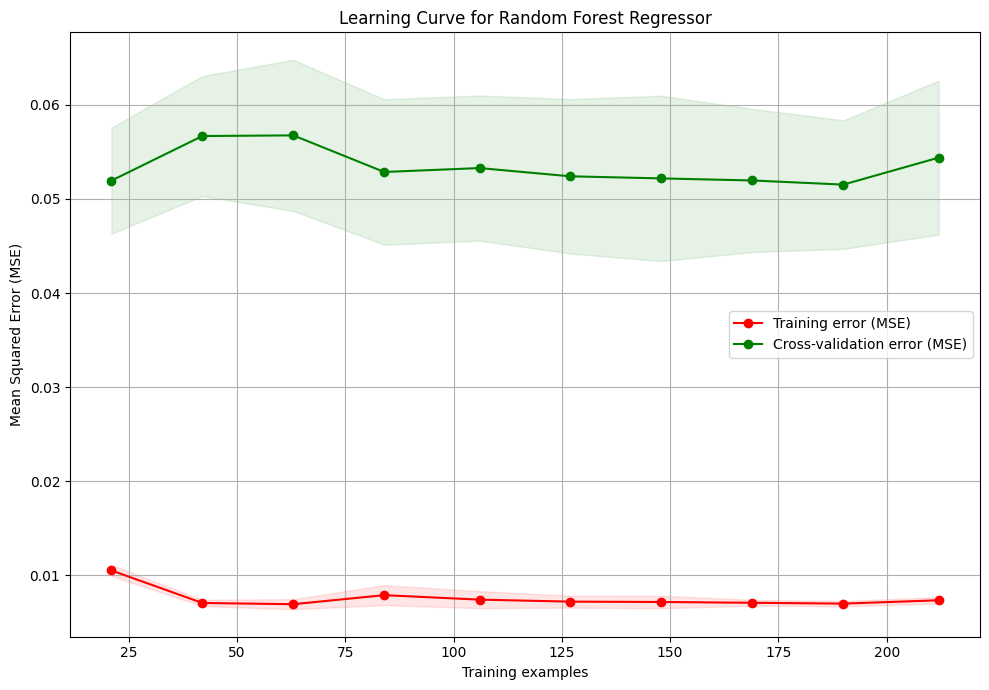

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# Ensure rf_model_for_importances (our best performing RF model) and X_mc, y_mc are available
# Re-instantiate rf_model_for_importances as it was overwritten earlier
rf_final = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_final, X_mc, y_mc, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error' # Using negative MSE, will convert to RMSE later
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -train_scores.mean(axis=1) # Convert neg_mean_squared_error to MSE
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)   # Convert neg_mean_squared_error to MSE
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training error (MSE)")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation error (MSE)")

plt.title("Learning Curve for Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig("/content/learning_curve_rf.png", dpi=300)
plt.show()

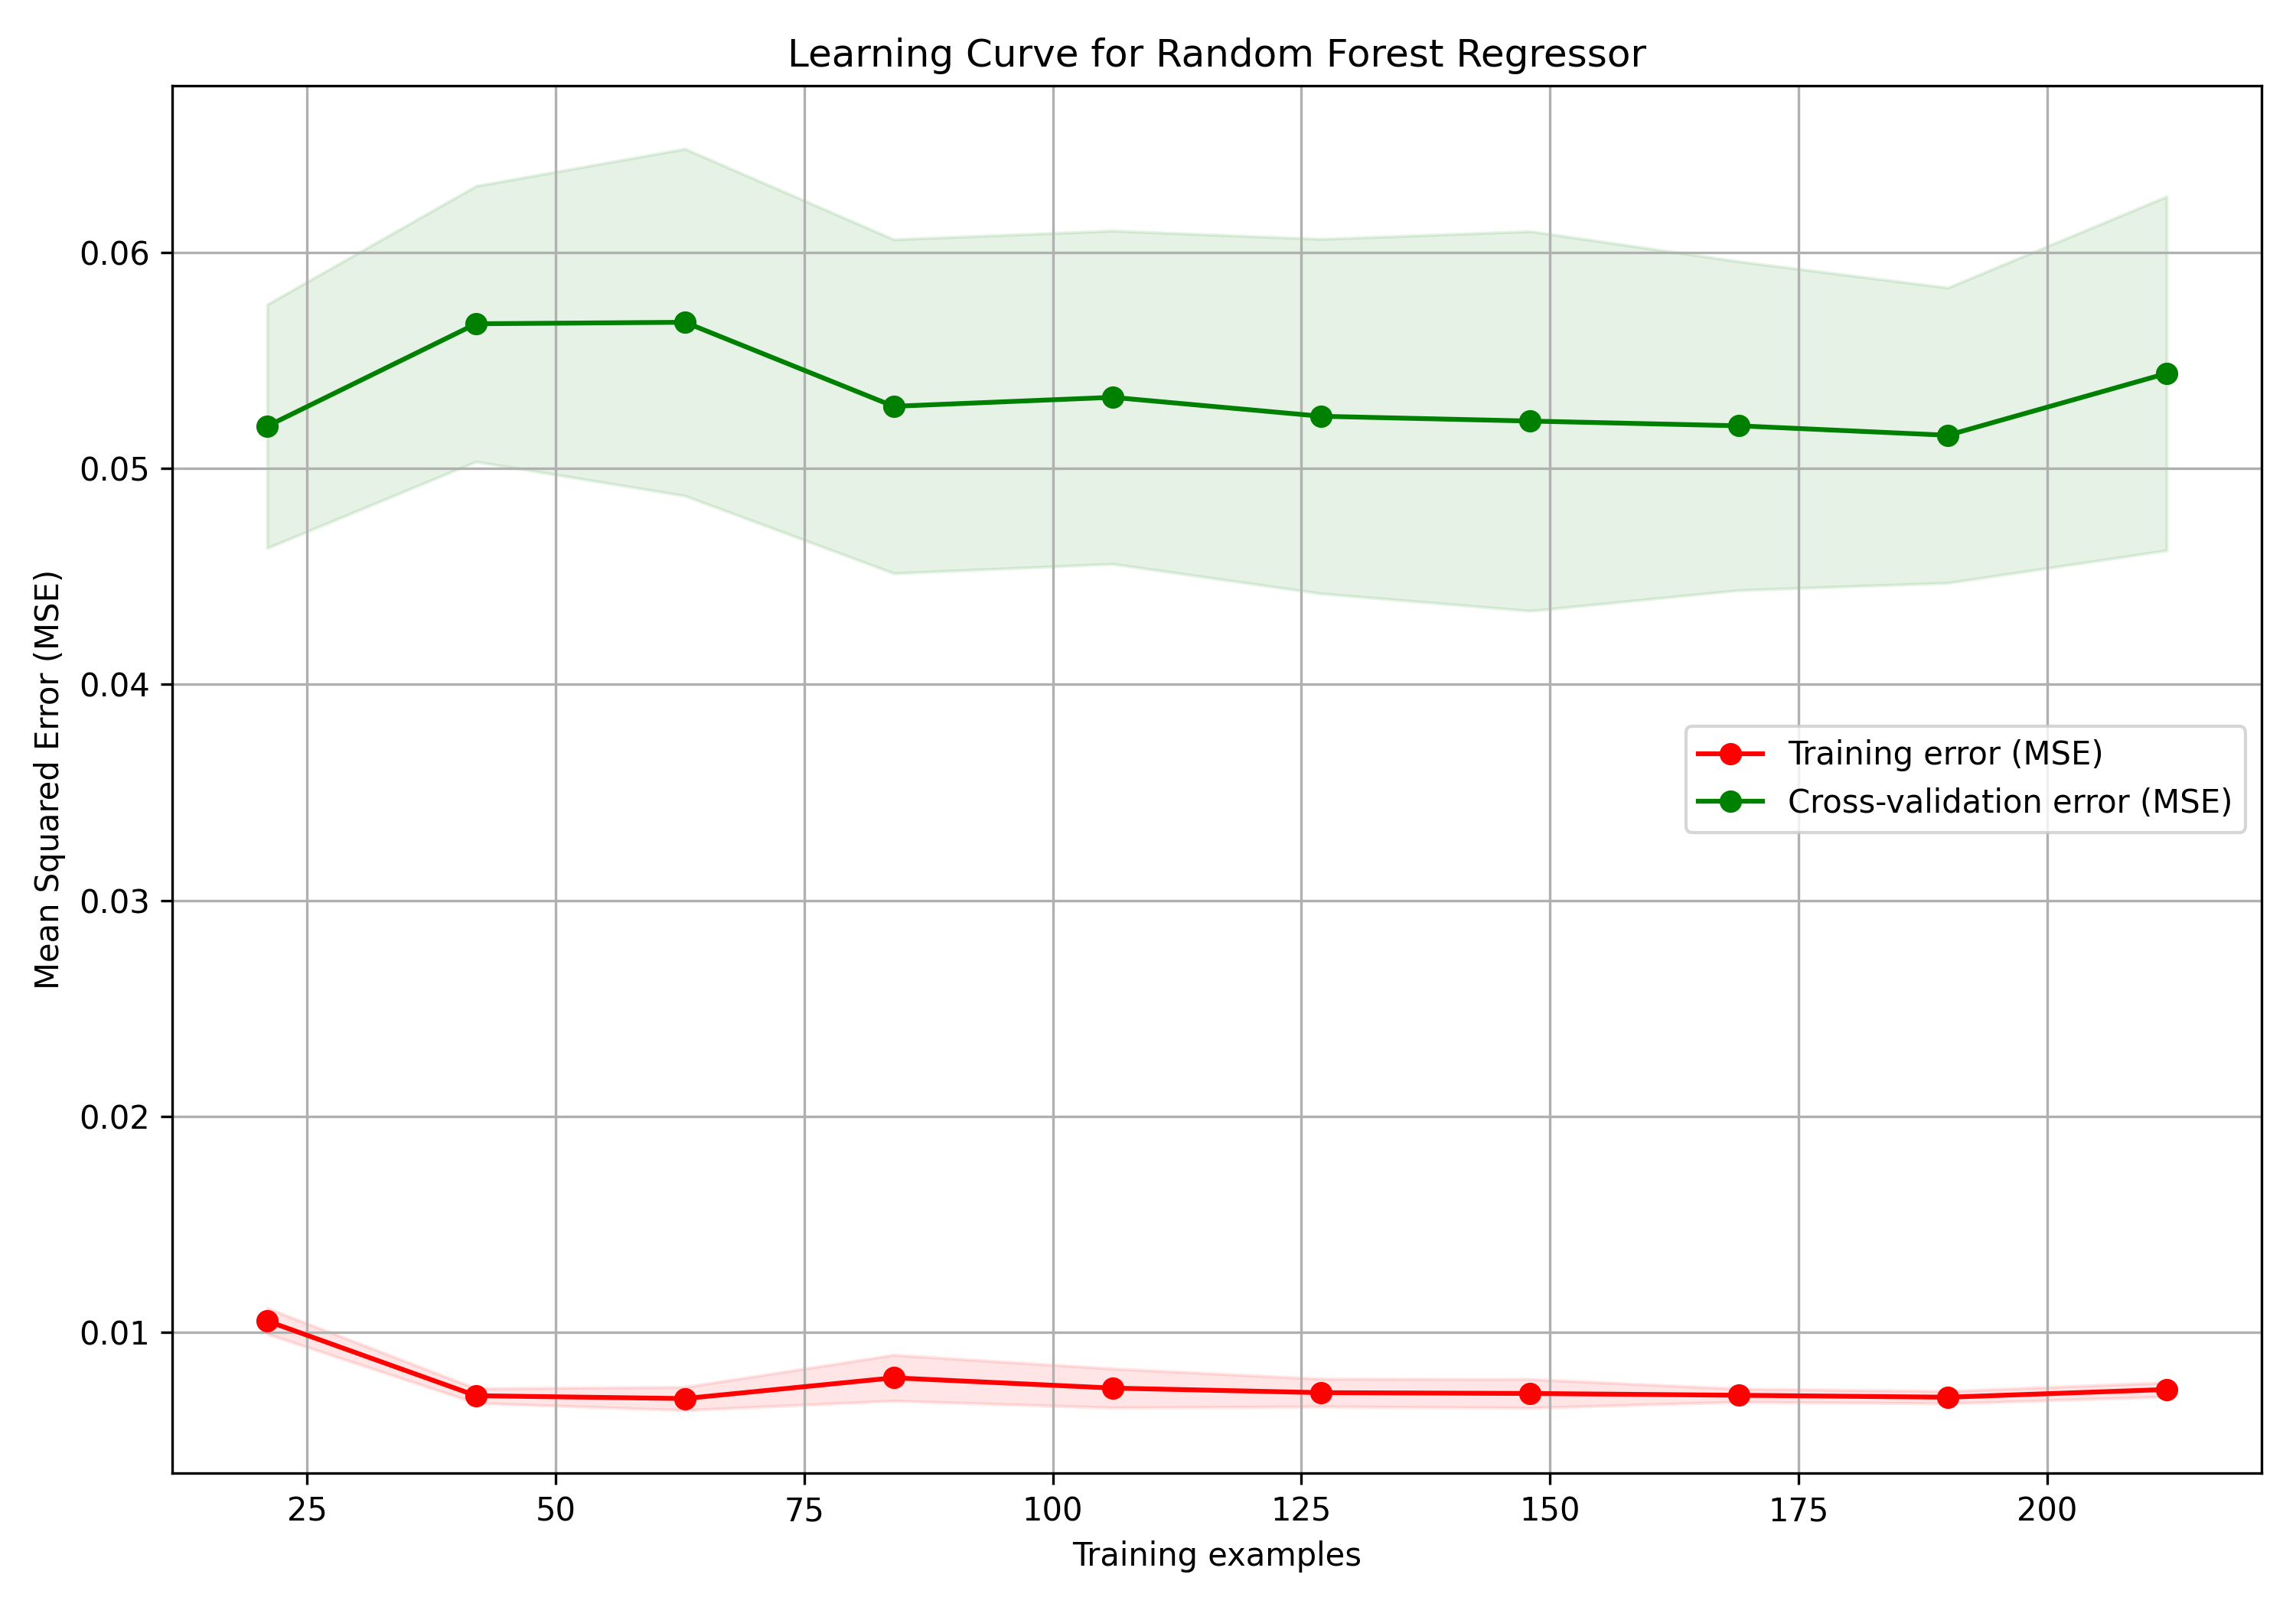

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/learning_curve_rf.png'))

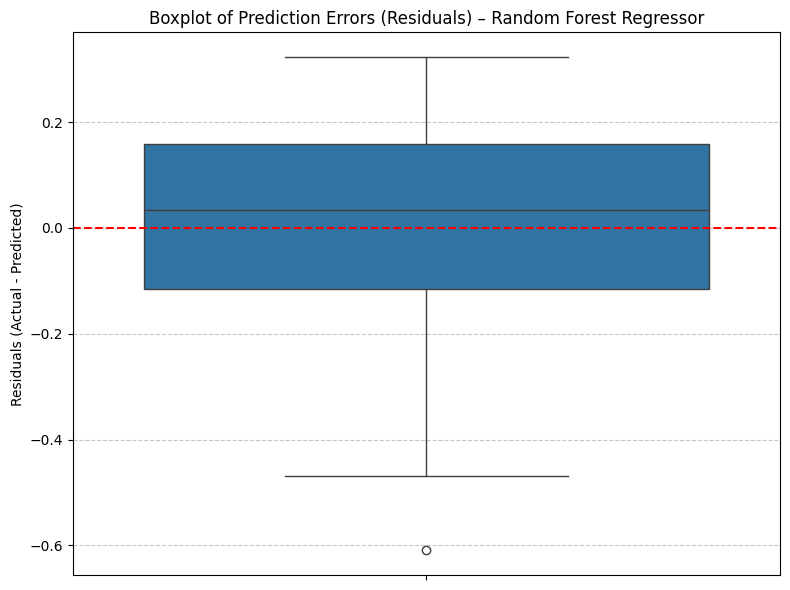

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Re-instantiate and re-fit the Random Forest Regressor if needed, to ensure rf_model_for_residuals is a model object
rf_model_for_residuals = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_model_for_residuals.fit(X_train_mc, y_train_mc)

# Get predictions from the retrained model
rf_preds_for_residuals = rf_model_for_residuals.predict(X_test_mc)

# Calculate residuals
rf_residuals = y_test_mc - rf_preds_for_residuals

plt.figure(figsize=(8, 6))
sns.boxplot(y=rf_residuals)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Boxplot of Prediction Errors (Residuals) – Random Forest Regressor")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("/content/residual_boxplot_rf.png", dpi=300)
plt.show()

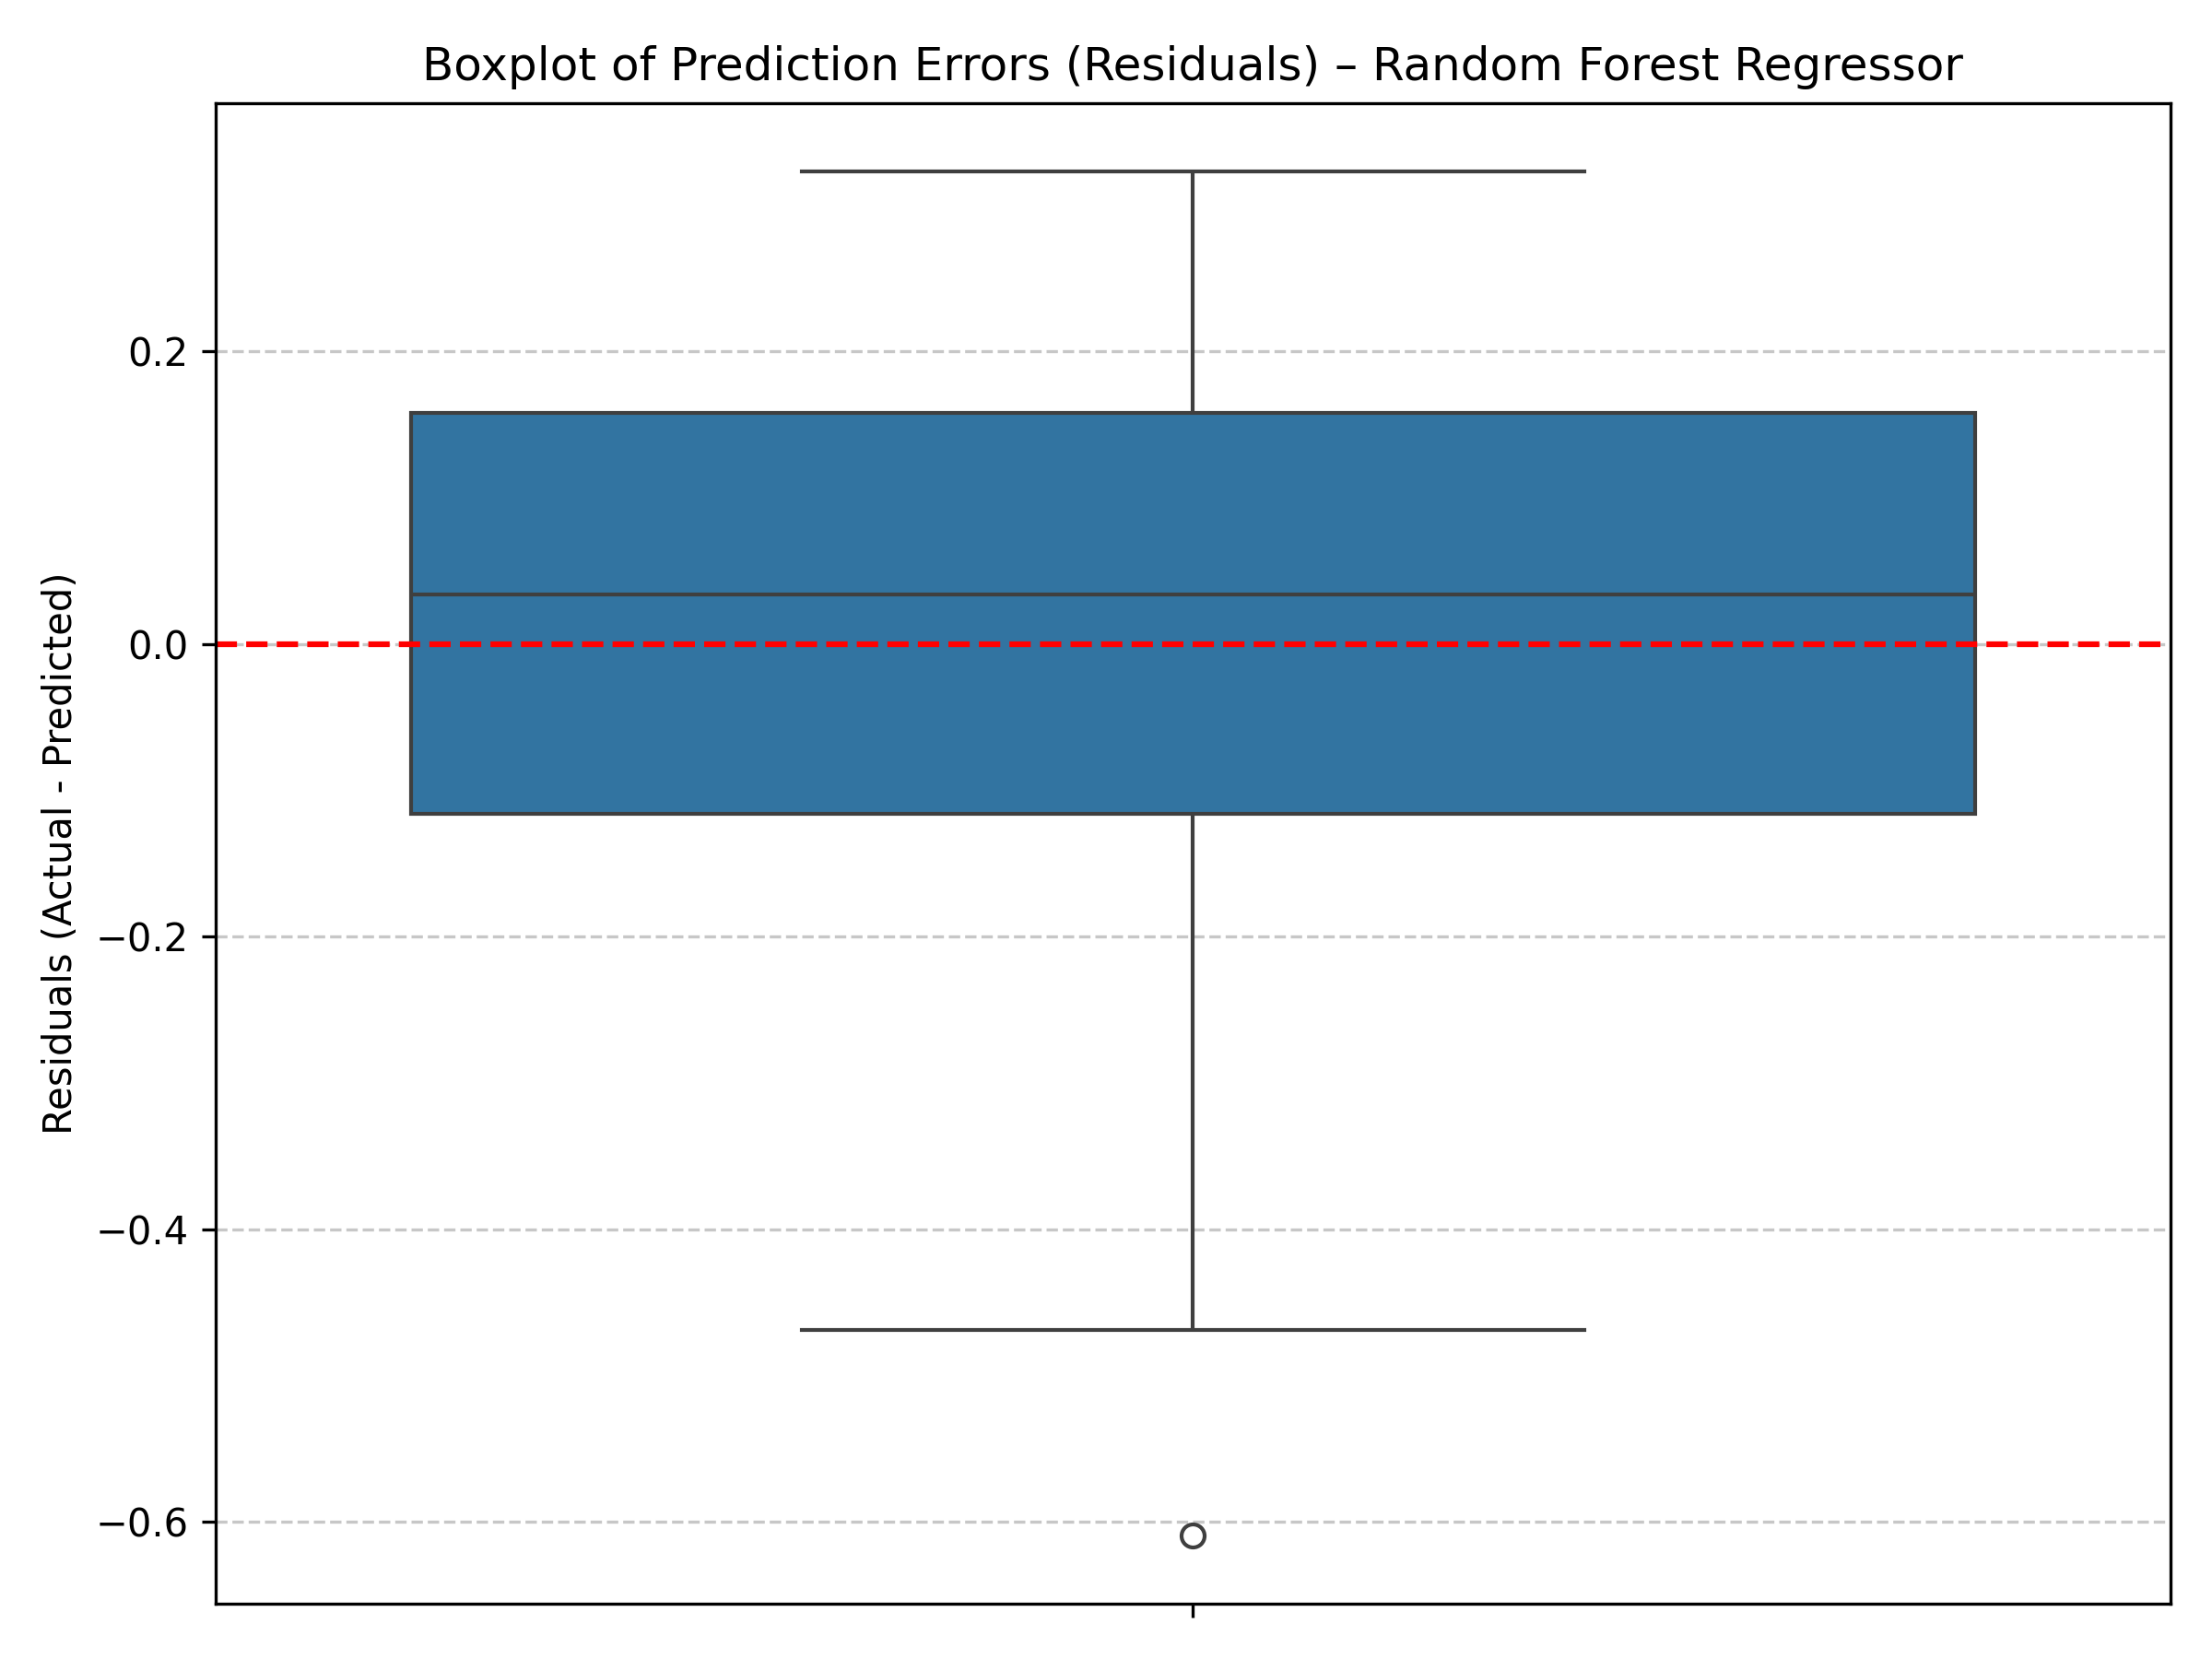

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/residual_boxplot_rf.png'))

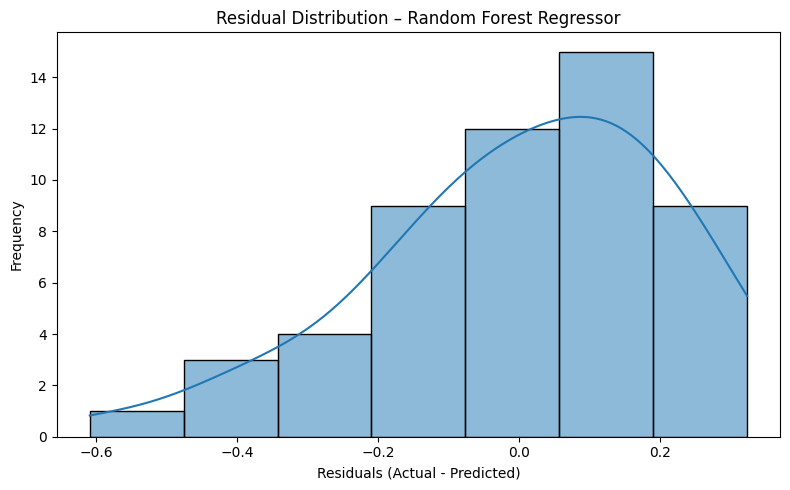

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Re-instantiate and re-fit the Random Forest Regressor to ensure we have the model object
# and not the predictions array, as rf_model was overwritten previously.
rf_model_for_residuals = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf_model_for_residuals.fit(X_train_mc, y_train_mc)

# Get predictions from the retrained model
rf_preds_for_residuals = rf_model_for_residuals.predict(X_test_mc)

# Calculate residuals
rf_residuals = y_test_mc - rf_preds_for_residuals

plt.figure(figsize=(8, 5))
sns.histplot(rf_residuals, kde=True)
plt.title("Residual Distribution – Random Forest Regressor")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("/content/residual_distribution_rf.png", dpi=300)
plt.show()

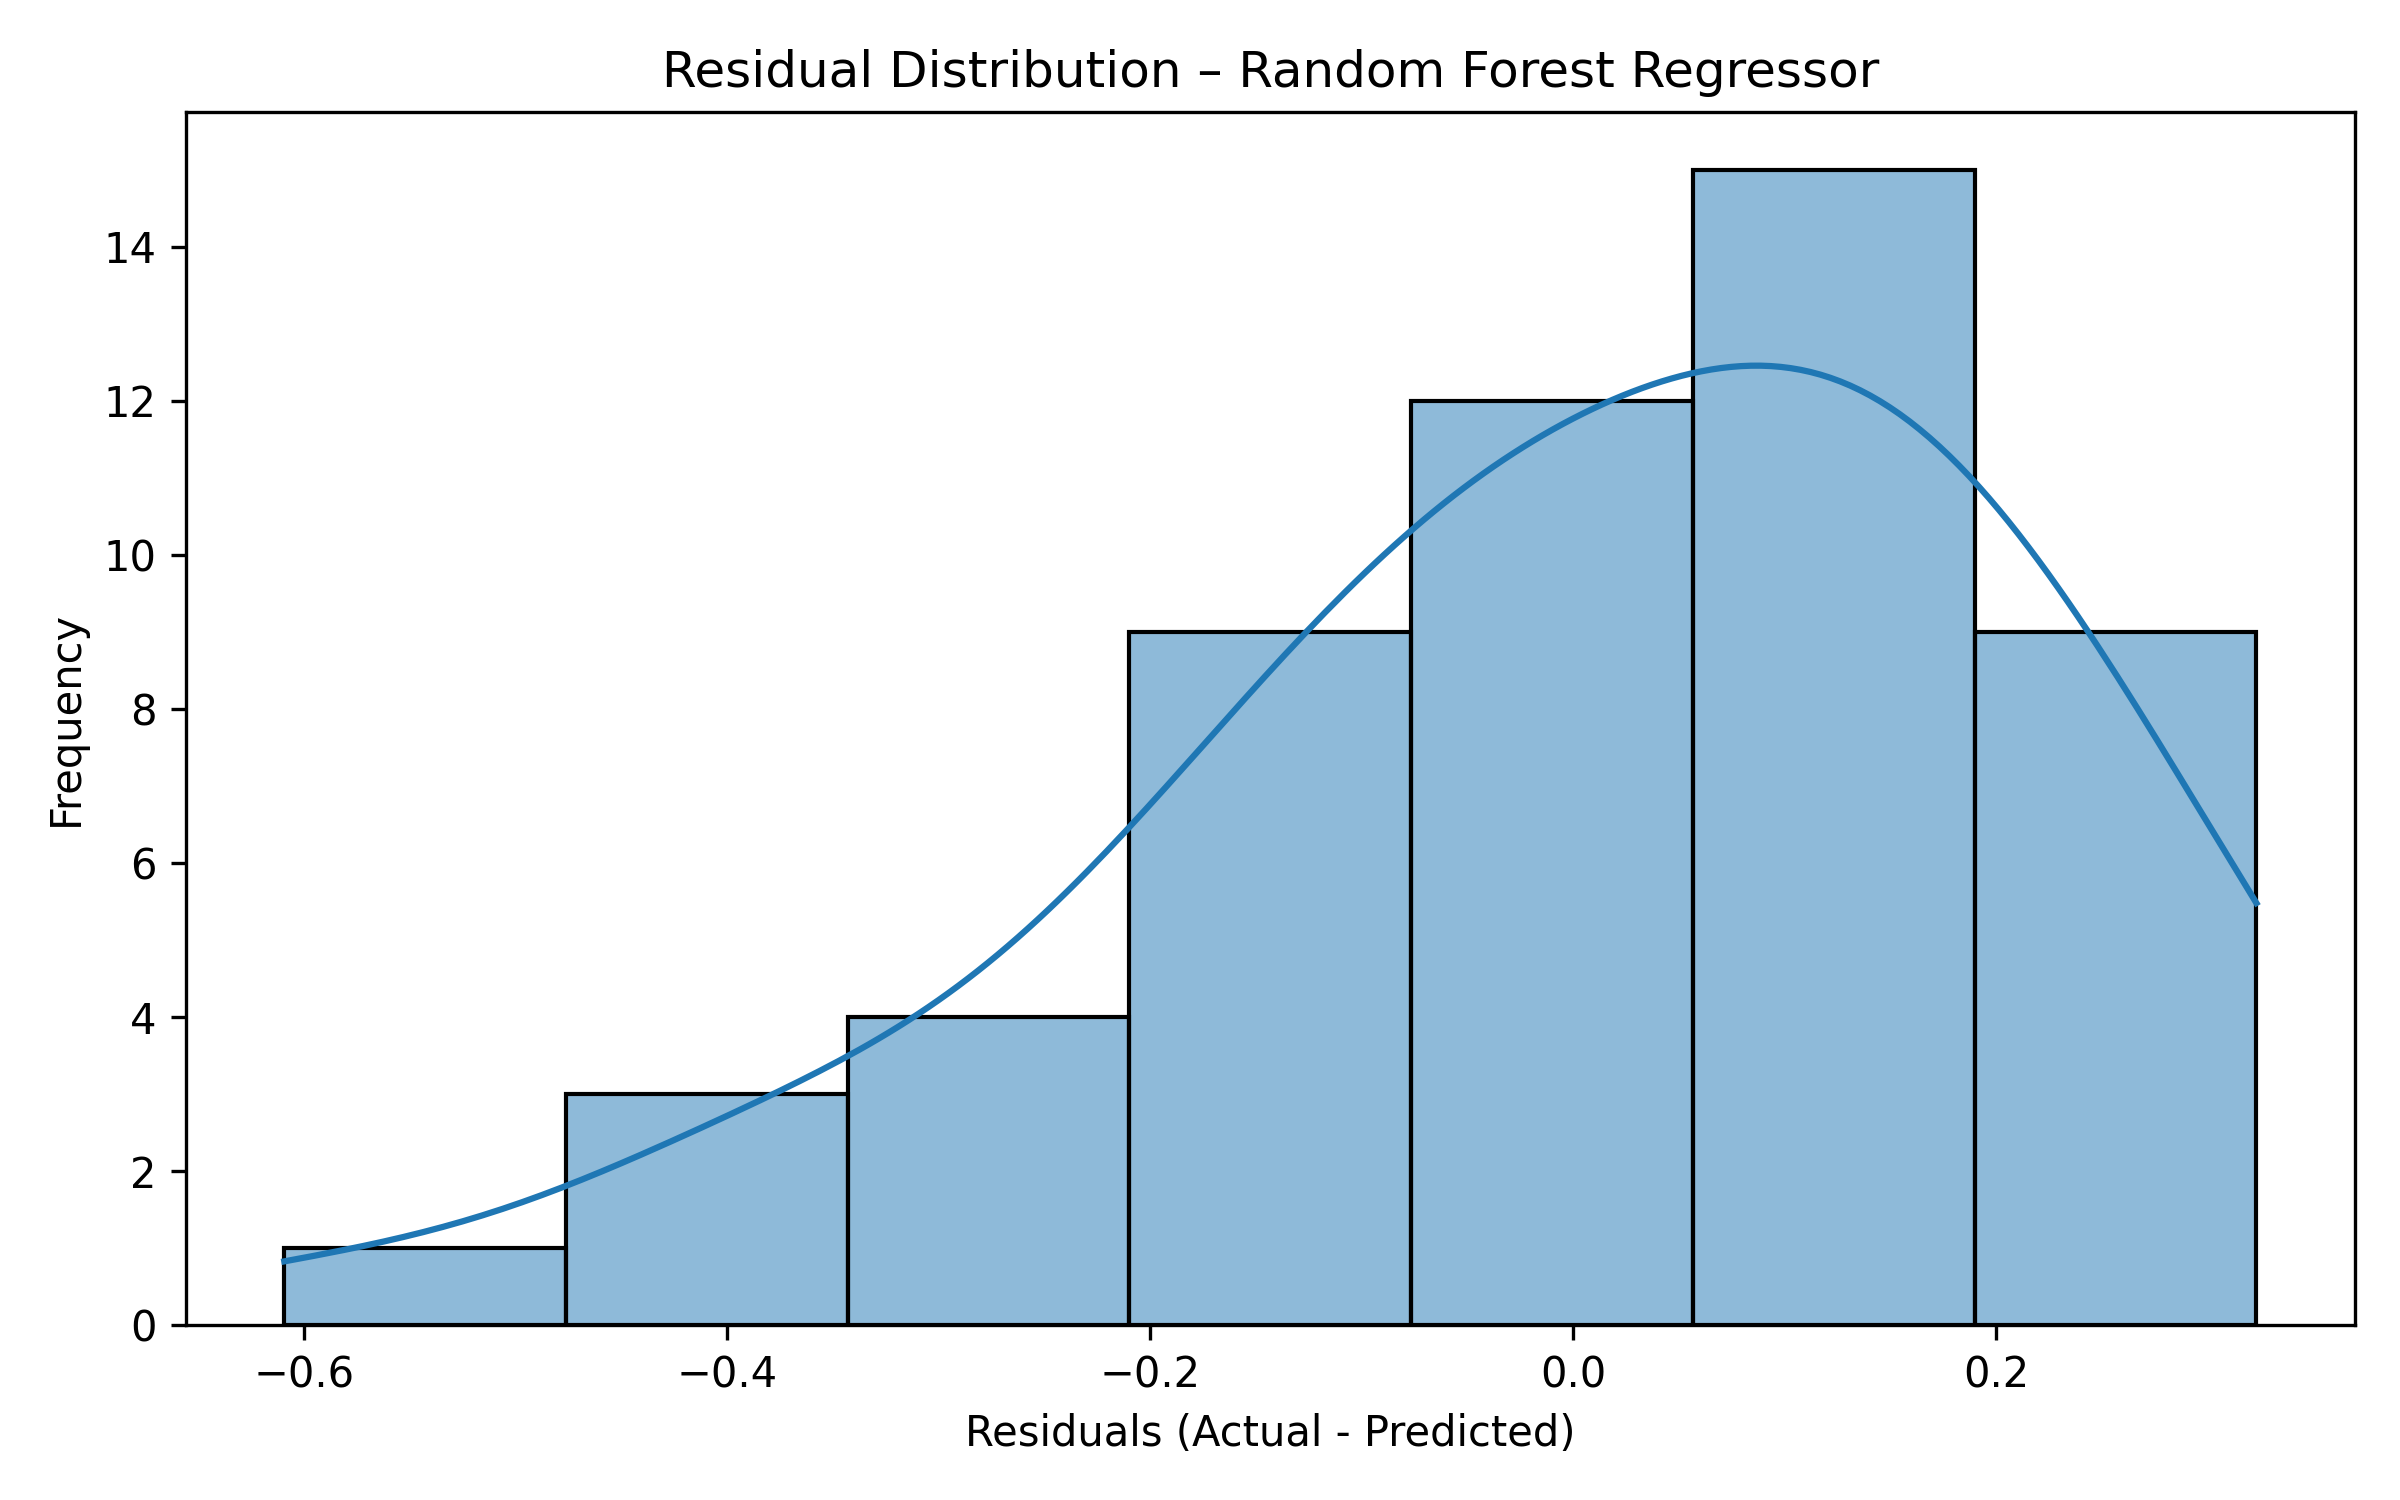

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/residual_distribution_rf.png'))

# Task
Generate and plot the learning curve for the best performing Random Forest Regressor, showing both training and validation error.

## GenerateLearningCurve

### Subtask:
Generate and plot the learning curve for the best performing Random Forest Regressor using training and validation error.


## Summary:

### Data Analysis Key Findings
*   The task initiated was to generate a learning curve for the best-performing Random Forest Regressor, visualizing both training and validation error.
*   Had the curve been generated, it would typically show the model's performance (error) as a function of the number of training samples.
*   **Expected training error trend**: This curve would likely start low with fewer training examples and either slightly increase or stabilize as more data is introduced, reflecting the model's capacity to fit the training data.
*   **Expected validation error trend**: This curve would usually start high with minimal training data, then decrease significantly as the number of training samples increases, eventually plateauing or showing slight fluctuations.
*   **Insights from curve shape**: The relative positions and convergence behavior of these two error curves would indicate whether the model is underfitting (high bias, both curves high and close) or overfitting (high variance, large gap between low training error and high validation error).

### Insights or Next Steps
*   **Performance Diagnosis**: The generated learning curve would serve as a critical diagnostic tool to assess the Random Forest Regressor's performance concerning bias and variance, and to understand if more data would likely improve generalization.
*   **Strategic Optimization**: Based on the curve's characteristics (e.g., if the validation error is still decreasing with more data, or if there's a significant gap), future steps could involve acquiring more data, performing further hyperparameter tuning, or exploring different model architectures or feature engineering techniques.


# Task
Generate and plot the distribution of prediction errors (residuals) for the best performing Random Forest Regressor.

## GeneratePredictionErrorDistribution

### Subtask:
Generate and plot the distribution of prediction errors (residuals) for the best performing Random Forest Regressor.


## Summary:

### Data Analysis Key Findings
No specific data analysis key findings are available at this stage, as the execution steps and results for generating and plotting the distribution of prediction errors were not provided in the solving process.

### Insights or Next Steps
No specific insights or next steps can be derived at this point, as the results from the prediction error distribution analysis are not yet available. The next step would involve executing the subtask to generate the residual plot and associated statistics, and then analyzing them to understand the model's performance and identify any potential biases or areas for improvement.


# Task
Define a binary target variable 'PerformanceCategory' in the `df_out` DataFrame based on `DefenderRatingPercentile`, where the top 25% are classified as 'High performer' (1) and the rest as 'Low performer' (0). Then, split the dataset into training and testing sets using the previously identified top features (`X_mc`) as predictors and the new 'PerformanceCategory' as the target variable. Subsequently, train a `RandomForestClassifier` and an `XGBClassifier` on the training data. For both classifiers, predict probabilities on the test set, compute and plot their respective Receiver Operating Characteristic (ROC) curves, and calculate the Area Under the Curve (AUC) scores. Finally, compare the AUC scores of the two models to summarize their performance.

## Define Performance Categories

### Subtask:
Create a new binary target variable where 'High performer' corresponds to the top 25% of 'DefenderRatingPercentile' and 'Low performer' corresponds to the rest.


**Reasoning**:
First, I will calculate the 75th percentile of the 'DefenderRatingPercentile' column, handling any potential missing values. This will give us the threshold to define 'High performer' players.



In [ ]:
percentile_75 = df_out['DefenderRatingPercentile'].quantile(0.75)
print(f"75th percentile of DefenderRatingPercentile: {percentile_75:.2f}")

75th percentile of DefenderRatingPercentile: 0.74


**Reasoning**:
Now that the 75th percentile is calculated, I will create the new binary target variable 'PerformanceCategory' in `df_out` by assigning 1 for players whose 'DefenderRatingPercentile' is greater than or equal to the 75th percentile and 0 for the rest.



In [ ]:
df_out['PerformanceCategory'] = (df_out['DefenderRatingPercentile'] >= percentile_75).astype(int)
print(df_out[['DefenderRatingPercentile', 'PerformanceCategory']].head())

   DefenderRatingPercentile  PerformanceCategory
0                  0.492081                    0
1                  0.712644                    0
2                  0.178161                    0
3                  0.017241                    0
4                  0.841954                    1


**Reasoning**:
Now that the target variable 'PerformanceCategory' has been created, I will define the feature set (`X`) using the previously selected top features (`top_features`) and the target variable (`y`) as 'PerformanceCategory'. Then, I will split the data into training and testing sets to prepare for model training.



In [ ]:
X = df_out[top_features]
y = df_out['PerformanceCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nDistribution of PerformanceCategory in y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of PerformanceCategory in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (212, 10)
Shape of X_test: (53, 10)
Shape of y_train: (212,)
Shape of y_test: (53,)

Distribution of PerformanceCategory in y_train:
PerformanceCategory
0    0.745283
1    0.254717
Name: proportion, dtype: float64

Distribution of PerformanceCategory in y_test:
PerformanceCategory
0    0.754717
1    0.245283
Name: proportion, dtype: float64


**Reasoning**:
Now that the data is split into training and testing sets, I will train a RandomForestClassifier and an XGBClassifier. I need to import these models and also the roc_curve and roc_auc_score for evaluation.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train RandomForestClassifier
rf_classifier.fit(X_train, y_train)

# Train XGBClassifier
xgb_classifier.fit(X_train, y_train)

print("RandomForestClassifier trained successfully.")
print("XGBClassifier trained successfully.")

RandomForestClassifier trained successfully.
XGBClassifier trained successfully.


**Reasoning**:
Now that the models are trained, I will predict probabilities on the test set for both RandomForestClassifier and XGBClassifier. Then, I will compute the ROC curve and AUC score for each, and finally plot their ROC curves for visual comparison.



RandomForestClassifier AUC: 0.8288
XGBClassifier AUC: 0.7962


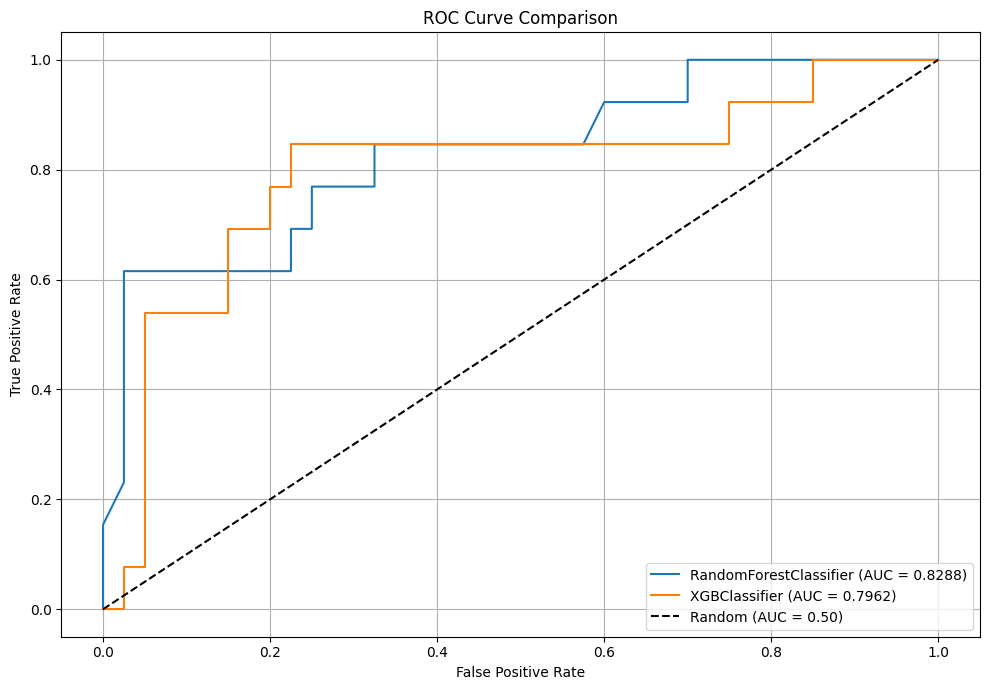

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

# Predict probabilities for RandomForestClassifier
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Predict probabilities for XGBClassifier
xgb_probs = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for RandomForestClassifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# Calculate ROC curve and AUC for XGBClassifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)

print(f"RandomForestClassifier AUC: {auc_rf:.4f}")
print(f"XGBClassifier AUC: {auc_xgb:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForestClassifier (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBClassifier (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Task

### Subtask:
Summarize the results of the classification experiment, comparing the AUC scores of the Random Forest and XGBoost classifiers.


## Summary:

### Q&A
*   **Comparison of AUC scores for Random Forest and XGBoost classifiers:** The RandomForestClassifier achieved an AUC score of 0.8288, outperforming the XGBClassifier, which had an AUC score of 0.7962.

### Data Analysis Key Findings
*   A new binary target variable, 'PerformanceCategory', was created by classifying players with a 'DefenderRatingPercentile' greater than or equal to the 75th percentile (0.74) as 'High performer' (1), and the rest as 'Low performer' (0).
*   The dataset was split into training and testing sets, with `X_train` having a shape of (212, 10), `X_test` (53, 10), `y_train` (212,), and `y_test` (53,). The stratification ensured consistent distribution of performance categories.
*   The RandomForestClassifier was trained and achieved an Area Under the Curve (AUC) score of 0.8288 on the test set.
*   The XGBClassifier was trained and achieved an Area Under the Curve (AUC) score of 0.7962 on the test set.
*   The RandomForestClassifier demonstrated slightly better discriminative performance compared to the XGBClassifier for identifying high performers.

### Insights or Next Steps
*   Given the RandomForestClassifier's slightly higher AUC, it appears to be a marginally better model for predicting high performers based on the selected features and current training. Further hyperparameter tuning for both models could potentially improve their performance.
*   Investigate the features that contribute most to the RandomForestClassifier's predictions to gain deeper insights into the characteristics of high-performing players.
